In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
from os.path import exists

global count
global count2
count = 0
count2 =0

In [3]:
class Metropolis:
    def __init__(self,L,J=1,B=0,isTinf=False):
        self.L = L
        self.N = L*L
        self.J = J
        self.B = B
        count1 = 0
        count2 = 0
        
        self.sc = np.ones(self.N,dtype=np.int0)
        if(isTinf):
            self.sc = np.array([1-(int)(np.random.rand()*2)*2 for i in range(self.N)],dtype=np.int0)
        self.prob = np.zeros(2,dtype=np.double)

    def prob_calc(self,beta):
        for i in range(2):
            # 4 8
            self.prob[i] = np.exp(-beta*4*(i+1))

    def measure(self,func):
        res = 0
        # print(self.sc)
        for i in range(self.N):
            sum = func(i)
            res += self.J*sum*self.sc[i]

        sigma = np.sum(self.sc)
        HH = -res -self.B*sigma

        return sigma, HH

    def helical(self,i):
        sum = 0

        nn = i + 1
        if(nn == self.N): nn = 0
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    
    def sweep_pbc(self,i):
        sum = 0

        nn = i -1
        if((nn+1 % self.L) == 0) : nn += self.L
        sum += self.sc[nn]

        nn = i + 1
        if(nn % self.L == 0): nn -= self.L
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum
    
    def sweep_helical(self,i):
        sum = 0

        nn = i -1
        if(nn < 0) : nn += self.N
        sum += self.sc[nn]

        nn = i + 1
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]

        nn = i - self.L
        if(nn < 0): nn += self.N
        sum += self.sc[nn]

        nn = i + self.L
        if(nn >= self.N): nn -= self.N
        sum += self.sc[nn]
        return sum

    def calculate(self,random=False):
        global count, count2
        for i in range(self.N):
            if(random):
                k = np.random.randint(0,self.N-1)
            elif (self.N%2 ==0):
                k = 2*i
                if(k < self.N): k = k if int(k/self.L)%2 ==0 else k+1
                else:
                    k -= self.N
                    k = k+1 if int(k/self.L)%2 ==0 else k
            else:
                k = 2*i if 2*i < self.N else 2*i-self.N
            # print(k,'')

            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_helical(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

    def calculate2(self,random=False):
        global count, count2
        for i in range(self.N):
            k = i ## 순서대로 하고 있었네?
            if(random):
                k = np.random.randint(self.N)
            # delta = Enew - Eold
            delta = 2*self.sc[k]*self.J*self.sweep_pbc(k)
            count2 += 1
            # print(delta)
            if(delta <= 0): # A = 1
                count += 1
                self.sc[k] *= -1
            elif(np.random.rand() < self.prob[int(delta/4)-1]): #flip
                # print(delta, self.prob[int(delta/4)-1])
                count += 1
                self.sc[k] *= -1
        return 2*self.sc[k], delta

In [5]:
# Figure for equilibrium
def Equilibrium_drawer(T,factor = 1, mcs = 1000, N=100):
    T11 = Metropolis(N)
    T11.prob_calc(1/T)
    ls , mcs = np.array([10,20,40,60,100,200,400,1000,10000]), mcs
    ls , mcs = factor*ls, factor*mcs
    # ls = [1,2,4,6,10,20,40,100,1000]
    cnt = 0
    plt.figure(figsize=(8,8))
    # plt.subplots(constrained_layout=True)
    plt.subplot(3,3,1,aspect='equal')
    plt.axis('off')
    a = np.reshape(T11.sc,(T11.L,T11.L))
    plt.title("mcs =" + "0" +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
    plt.imshow(a,cmap="gray")

    for i in range(mcs+1):
        if(i == ls[cnt]):
            cnt += 1
            plt.subplot(3,3,cnt+1)
            plt.axis('off')
            a = np.reshape(T11.sc,(T11.L,T11.L))
            plt.title("mcs =" + str(ls[cnt-1]) +", |m| = " + str(np.abs(np.sum(T11.sc)/T11.N)))
            plt.imshow(a,cmap="Greys")
            print("cnt =",ls[cnt-1])
        T11.calculate()
    plt.subplots_adjust(right=0.9,top=0.9, wspace=0.2, hspace=0.2)
    # plt.subplot_tool()
    plt.figure(dpi=600)
    plt.show()

cnt = 10
cnt = 20
cnt = 40
cnt = 60
cnt = 100
cnt = 200
cnt = 400
cnt = 1000


<Figure size 3600x2400 with 0 Axes>

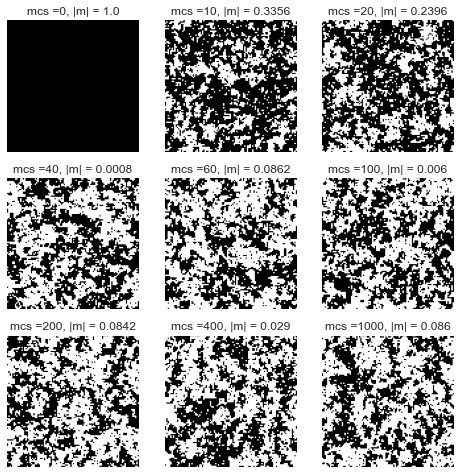

cnt = 30
cnt = 60
cnt = 120
cnt = 180
cnt = 300
cnt = 600
cnt = 1200
cnt = 3000


<Figure size 3600x2400 with 0 Axes>

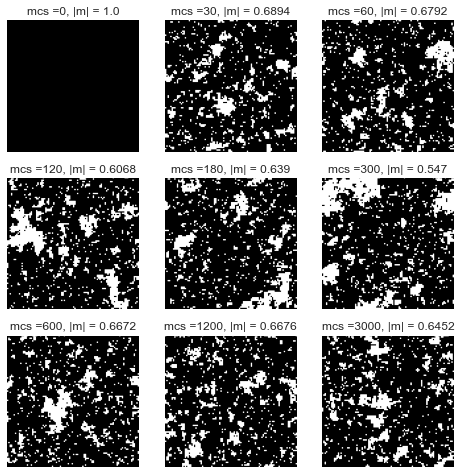

cnt = 20
cnt = 40
cnt = 80
cnt = 120
cnt = 200
cnt = 400
cnt = 800
cnt = 2000


<Figure size 3600x2400 with 0 Axes>

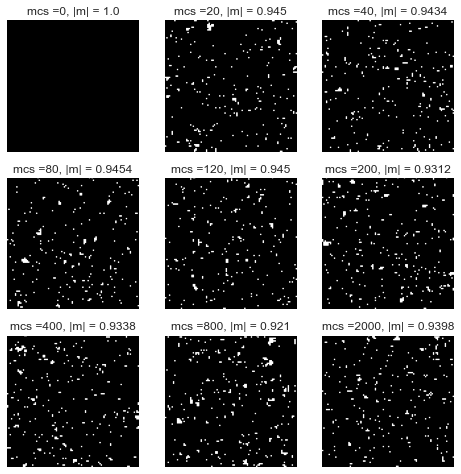

In [59]:
Equilibrium_drawer(2.6)
Equilibrium_drawer(2.27,factor = 3)
Equilibrium_drawer(1.9, factor = 2)

In [178]:
#autocorrection time
def __auto__(T_auto,isTinf,random,helical=True):
    epoch = 10000 #mcs

    mlist = np.zeros(epoch)

    M100100 = Metropolis(100,isTinf=isTinf)
    M100100.prob_calc(1/T_auto)
    for i in range(epoch):
        if(helical):
            M100100.calculate(random=random)
        else:
            M100100.calculate2(random=random)
        sigma, HH = M100100.measure(M100100.helical)
        mlist[i] = sigma/10000
    return mlist

def chi1(mlist):
    epoch = len(mlist)
    auto_chi1 = np.zeros(epoch)
    mlist2 = mlist-np.average(mlist)
    for i in range(epoch):
        auto_chi1[i] = np.average(mlist2[0:epoch-i]*mlist2[i:epoch])
    return auto_chi1

def chi2(mlist):
    epoch = len(mlist)
    auto_chi2 = np.zeros(epoch)
    for i in range(epoch):
        auto_chi2[i] = np.sum(mlist[0:epoch-i]*mlist[i:epoch])/(epoch-i) -np.sum(mlist[0:epoch-i])*np.sum(mlist[i:epoch])/(epoch-1)**2
    return auto_chi2

def tau_drawer(mlist, auto_chi1, auto_chi2, _bin2 = 150, slice = [250,500,1000,5000,10000], draw_fitting = [1,2,3]):
    ## Drawing time vs. magnetizaiton
    mag_fig_drawer(mlist)
    # slice = [250,500,1000,5000,10000]
    # draw_fitting = [1,2,3]
    cnt = 1
    size = len(slice)

    ## Fitting calculation
    # _bin2 = 150
    x = np.arange(0,_bin2)
    y = auto_chi1[0:_bin2]
    if(draw_fitting[0] != None):
        tt = np.polyfit(x,np.log(y),1,w=np.sqrt(y))

    ## Drawing subplots of time vs autocorrelation of m
    plt.figure(dpi=600)
    plt.figure(figsize=(16,8))
    plt.style.use('seaborn-whitegrid')

    for _bin in slice:
        xx = np.arange(0,_bin)

        plt.subplot(2,size,cnt)
        plt.plot(xx,auto_chi1[0:_bin]/auto_chi1[0],label="$\chi_1$")
        plt.plot(xx,auto_chi2[0:_bin]/auto_chi2[0],label="$\chi_2$")
        plt.axhline(1/np.e,linestyle='--',lw=1)
        plt.axhline(1/np.e**2,linestyle='--',lw=1)
        plt.xlim(0,_bin)
        plt.ylim(None,1.0)
        if cnt in draw_fitting:
            aa = np.arange(0,_bin)
            bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
            plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black',label="$\exp(-t/\\tau)$")
        if cnt == 1:
            plt.ylabel('Magnetization autocorrelation $\chi(t)/\chi(0)$')
            plt.legend()
        plt.xlabel('Time (or mcs) $t$')



        plt.subplot(2,size,cnt+size)
        plt.semilogy(xx,auto_chi1[0:_bin]/auto_chi1[0],label="$\chi_1$")
        plt.semilogy(xx,auto_chi2[0:_bin]/auto_chi2[0],label="$\chi_2$")
        plt.axhline(1/np.e,linestyle='--',lw=1)
        plt.axhline(1/np.e**2,linestyle='--',lw=1)
        plt.xlim(0,_bin)
        plt.ylim(None,1.0)
        if cnt in draw_fitting:
            aa = np.arange(0,_bin)
            bb = np.exp(tt[1]) *np.exp(tt[0]*aa)
            plt.plot(aa,bb/max(bb),linestyle='--',lw=1,color='black',label="$\exp(-t/\\tau)$")
        if cnt == 1:
            plt.ylabel('Magnetization autocorrelation $\chi(t)/\chi(0)$')
            plt.legend()
        plt.xlabel('Time (or mcs) $t$')
        cnt = cnt + 1

    plt.show()
    if(draw_fitting[0] != None):
        print("tau is", -1/tt[0])

def mag_fig_drawer(mlist):
    plt.figure(dpi=600)
    plt.style.use('seaborn-whitegrid')
    plt.axhline(np.average(mlist),c='red',lw=1)
    plt.plot(np.arange(0,len(mlist)),mlist)
    plt.ylim(None,1)
    plt.xlim(0,len(mlist))
    plt.ylabel('Magnetization $m$')
    plt.xlabel('Time (or mcs) $t$')
    plt.show()
    print("<m> is ",np.average(mlist))

def save_auto_data(data,path):
    f = open(path,'w')
    # f.write(np.array2string(data, precision=6, separator=',')[1:-1])
    data.flatten().tofile(f)
    f.close()

def load_auto_data(path):
    if(not exists(path)): return False, None
    f = open(path,'r')
    # line = f.readline()
    # # res = np.array([np.array(line.strip().split(','),dtype=np.double)],dtype=object)
    # res =np.fromstring(line,dtype=np.double,sep=',')
    res = np.fromfile(f)
    return True, res

def tau_drawer_2(mag_fig):
    fig_args = [mag_fig,chi1(mag_fig),chi2(mag_fig)]
    tau_drawer(fig_args[0],fig_args[1],fig_args[2])

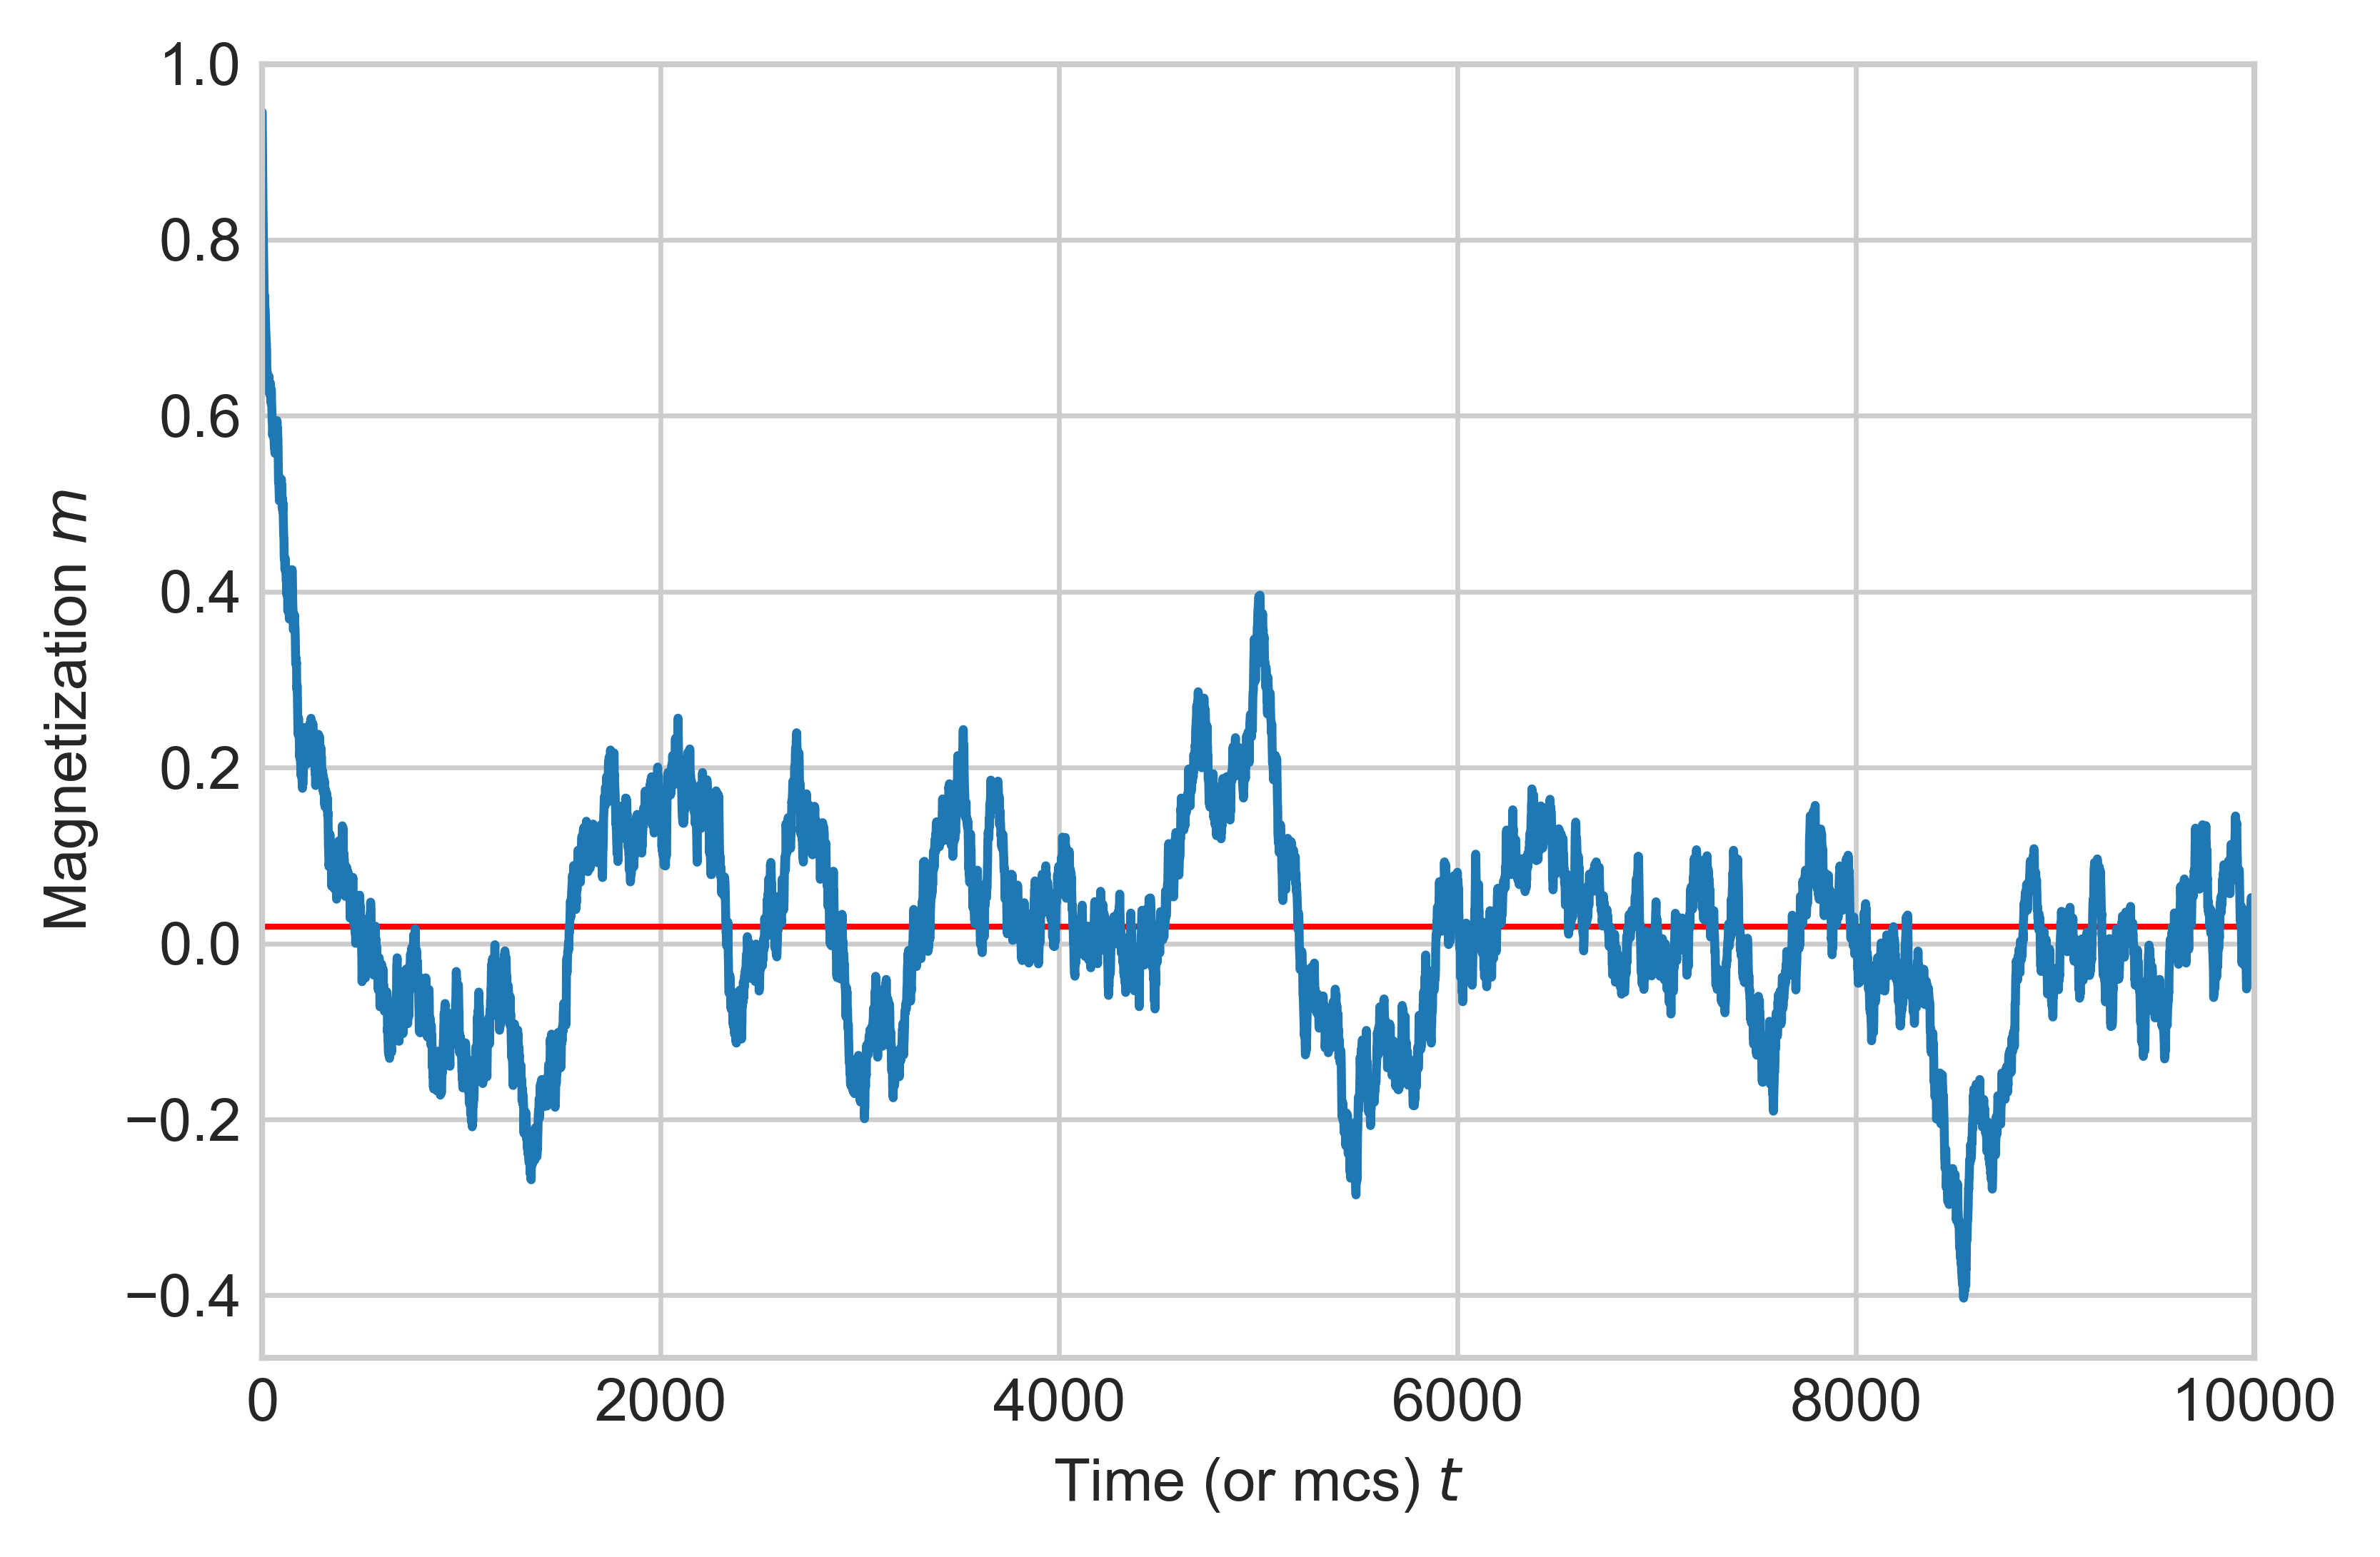

<m> is  0.01896904


<Figure size 3600x2400 with 0 Axes>

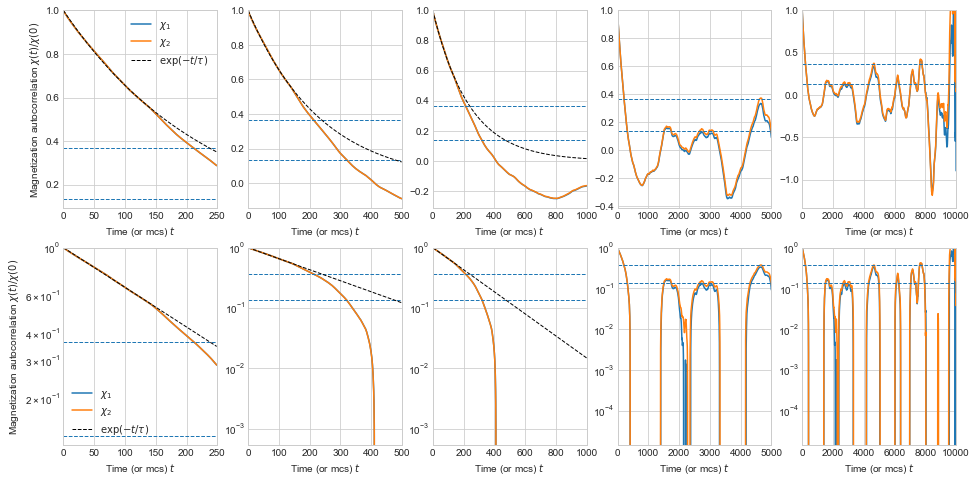

tau is 237.28420149574717


In [11]:
# isTinf = False, Pick Random site = True
exist, mag_fig1 = load_auto_data("Result/mag_fig1.txt")
if(not exist):
    mag_fig1 = __auto__(2.4,False,True)
    save_auto_data(mag_fig1,"Result/mag_fig1.txt")
tau_drawer_2(mag_fig1)

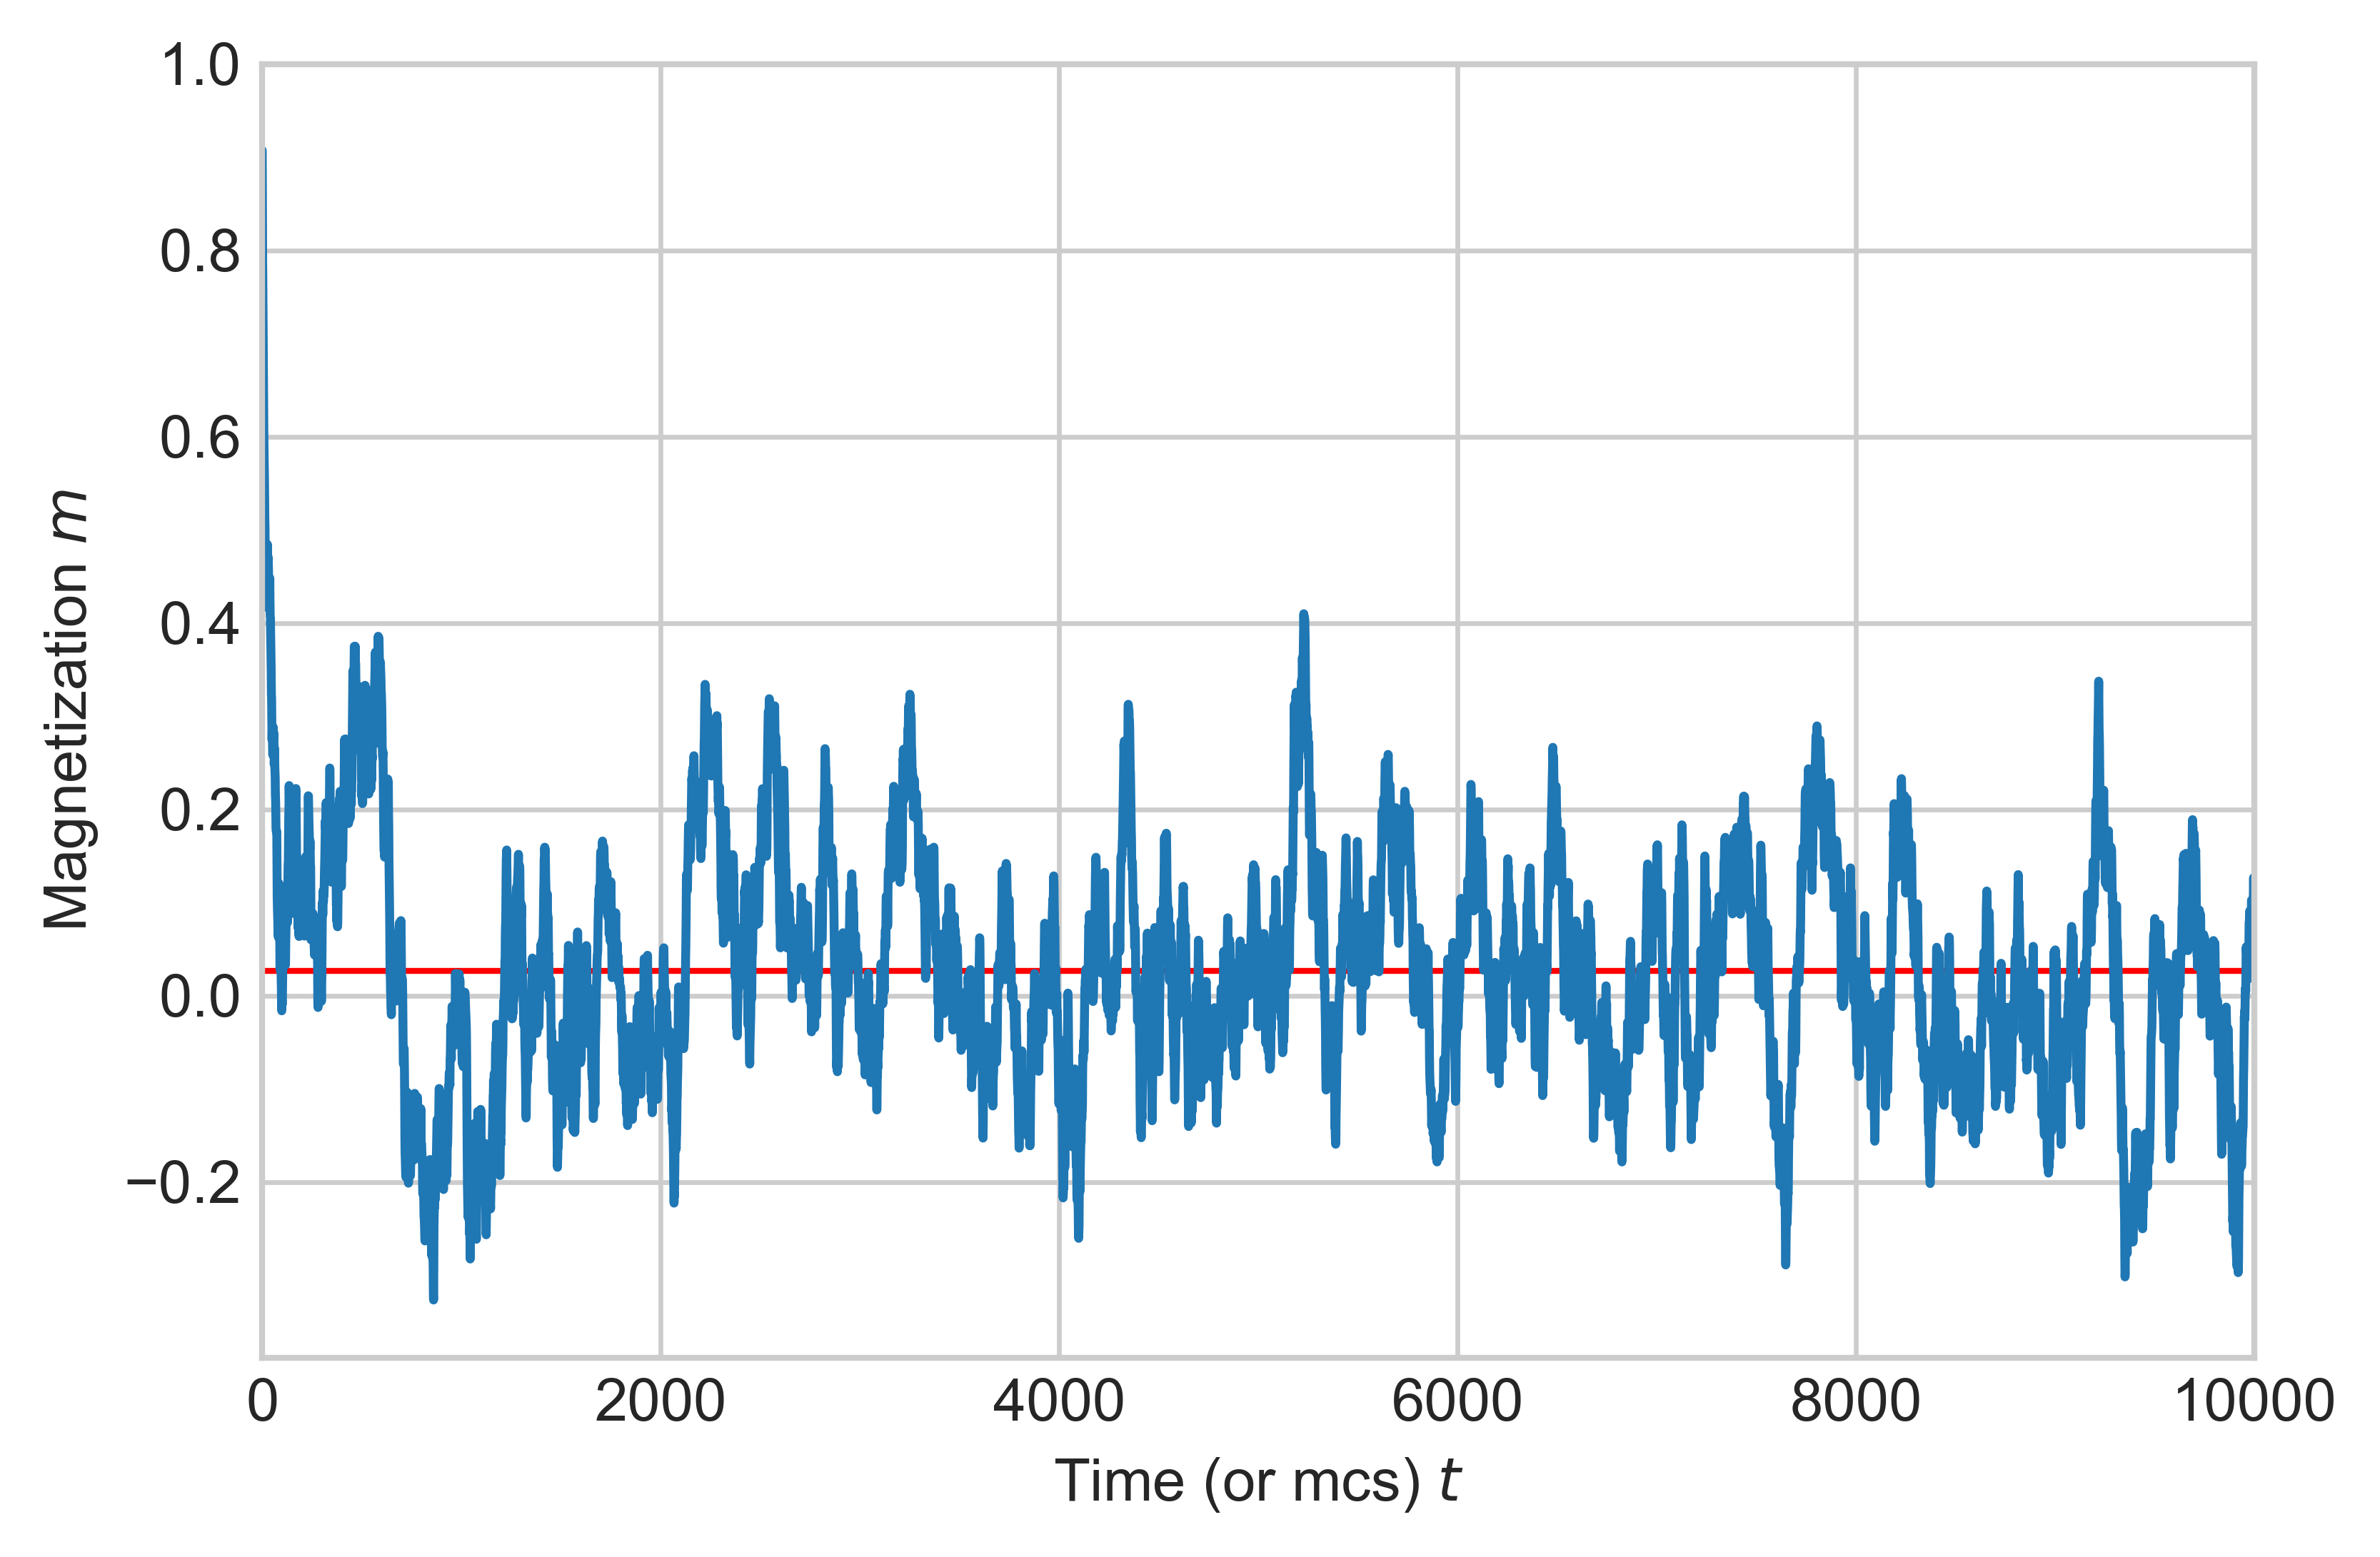

<m> is  0.026780400000000003


<Figure size 3600x2400 with 0 Axes>

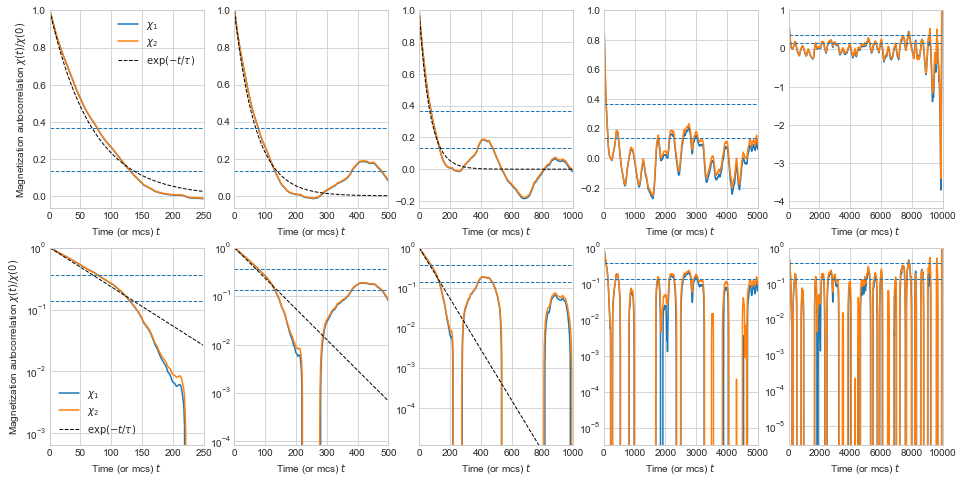

tau is 68.61009808206333


In [13]:
## Drawing time vs. magnetizaiton
# isTinf = False, Pick Random site = False
exist, mag_fig2 = load_auto_data("Result/mag_fig2.txt")
if(not exist):
    mag_fig2 = __auto__(2.4,False,False)
    save_auto_data(mag_fig2,"Result/mag_fig2.txt")
tau_drawer_2(mag_fig2)

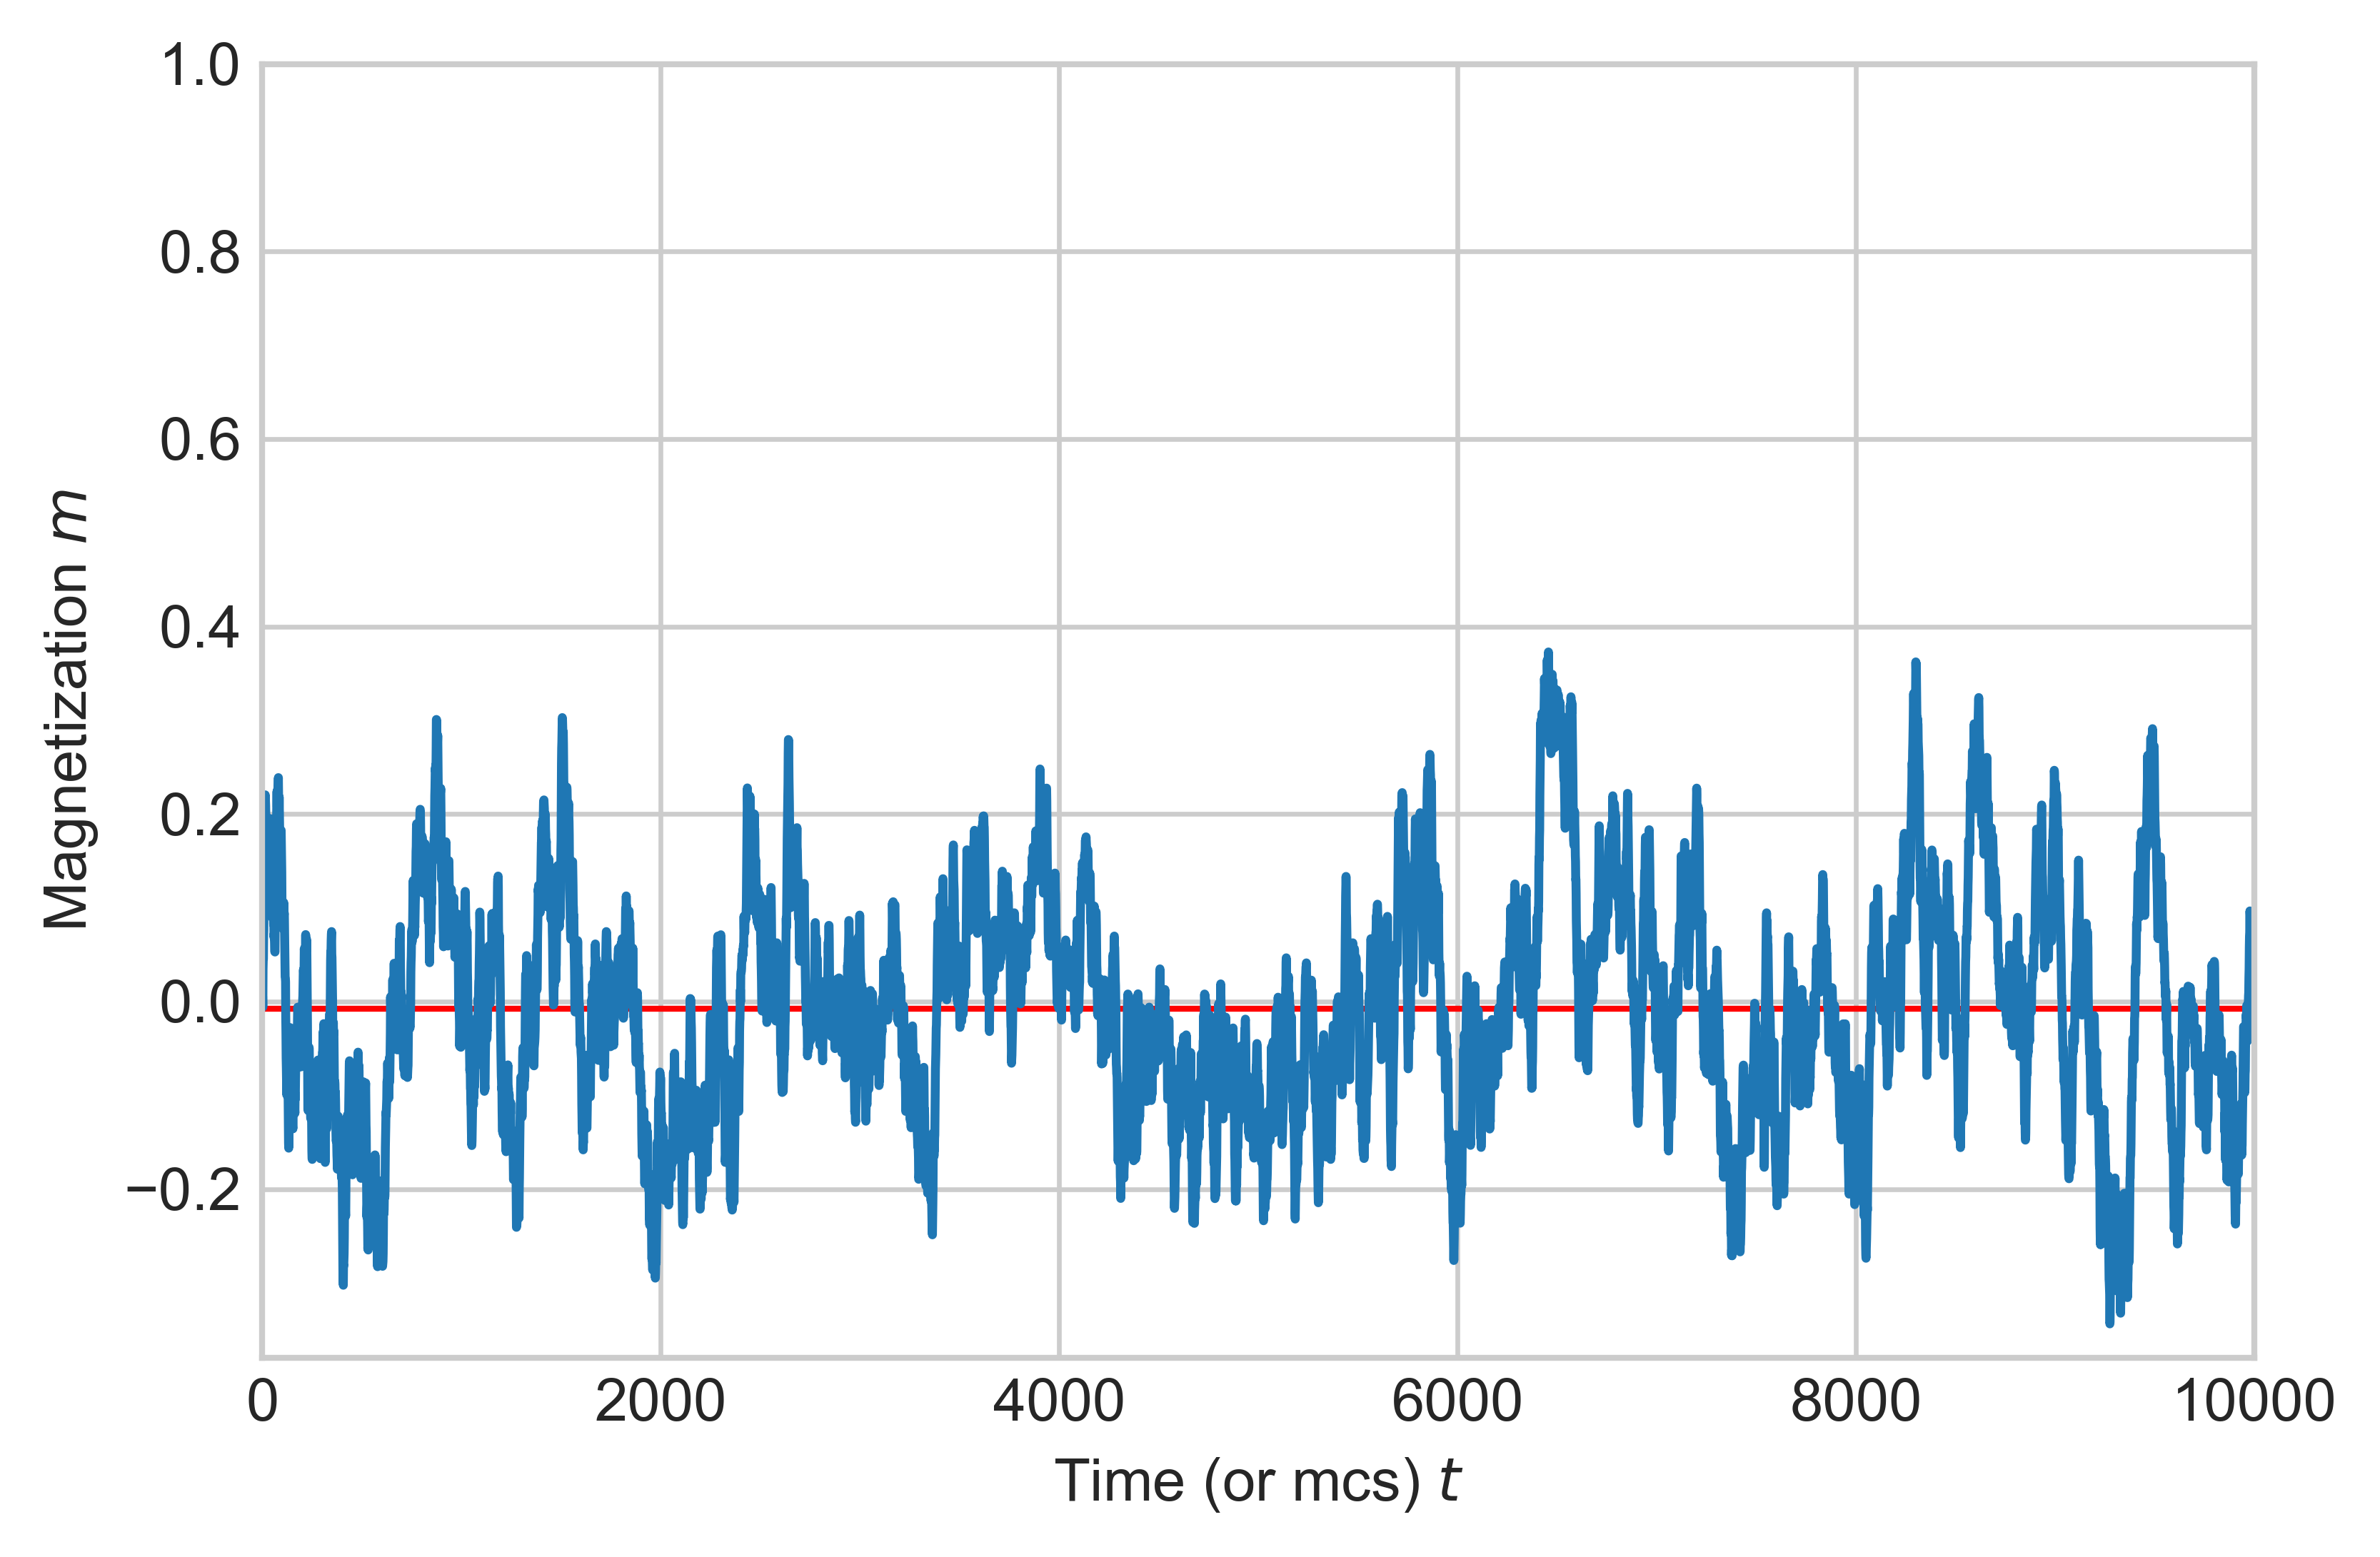

<m> is  -0.007907139999999997


<Figure size 3600x2400 with 0 Axes>

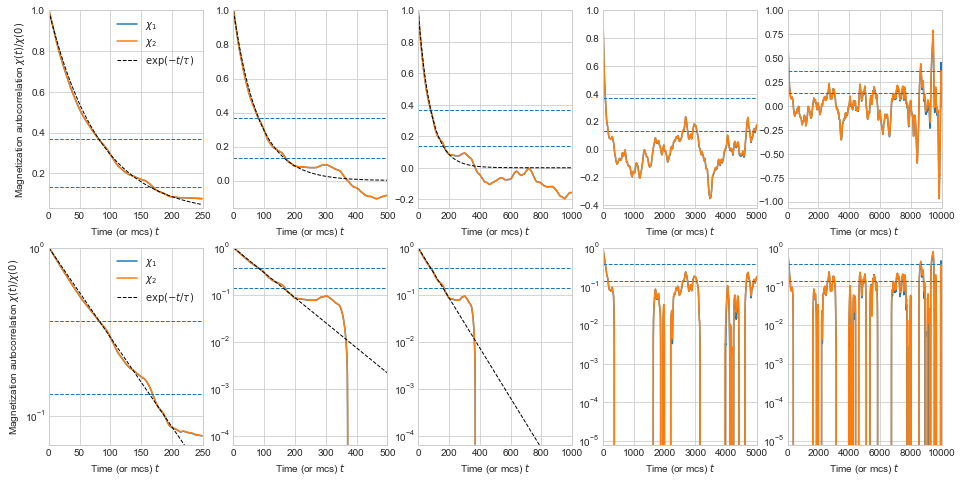

tau is 81.53515748736531


In [14]:
## Drawing time vs. magnetizaiton
# isTinf = True, Pick Random site = False
exist, mag_fig3 = load_auto_data("Result/mag_fig3.txt")
if(not exist):
    mag_fig3 = __auto__(2.4,True,False)
    save_auto_data(mag_fig3,"Result/mag_fig3.txt")
tau_drawer_2(mag_fig3)

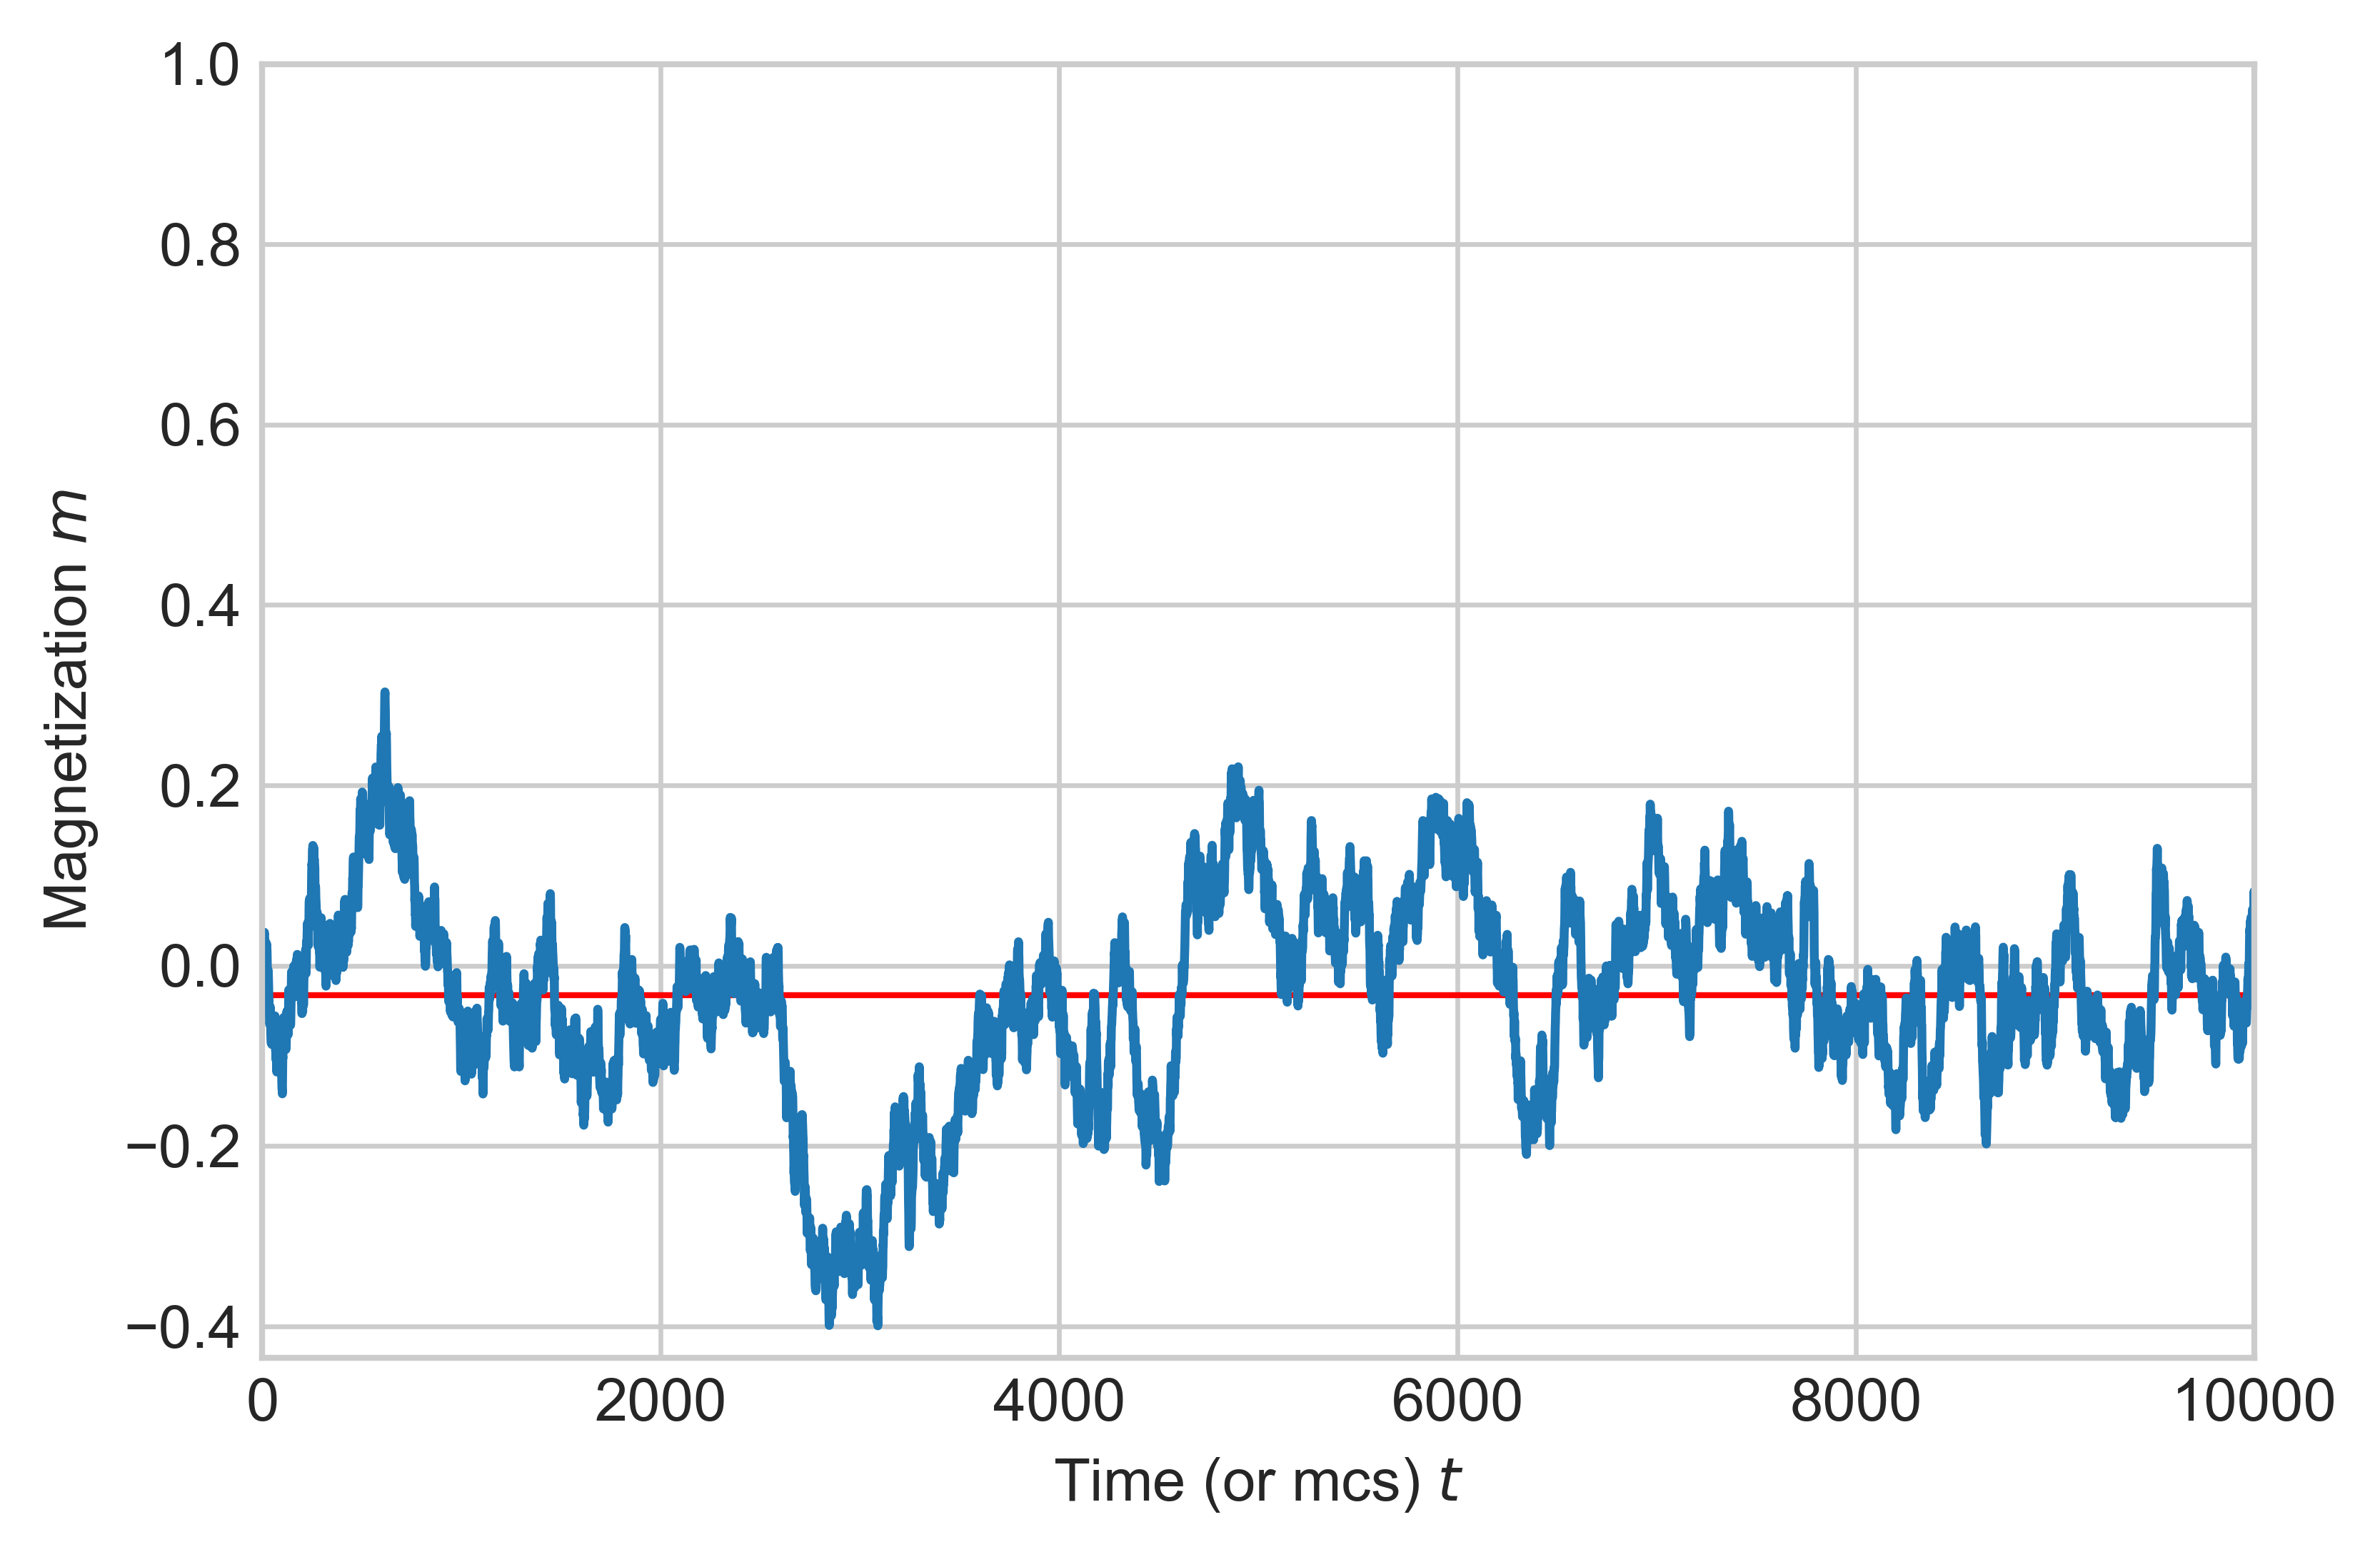

<m> is  -0.032829159999999996


<Figure size 3600x2400 with 0 Axes>

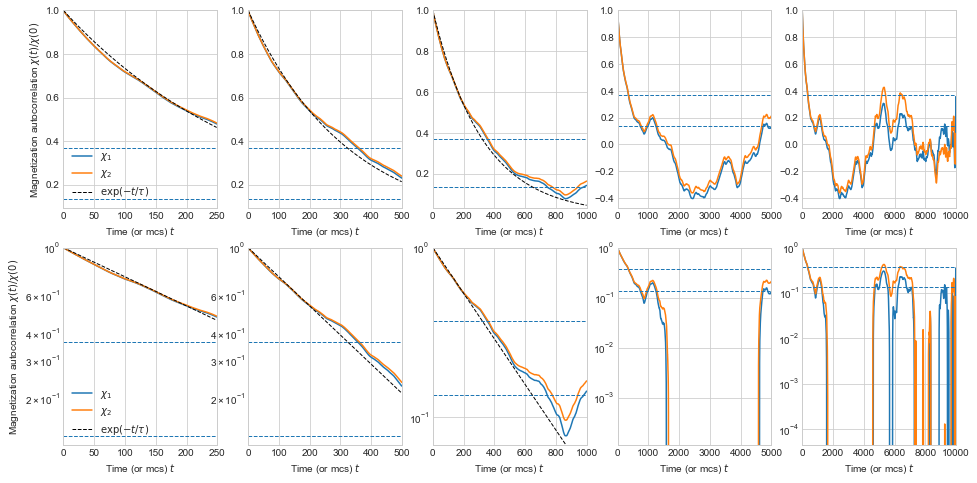

tau is 322.91035443813945


In [15]:
# isTinf = True, Pick Random site = True
exist, mag_fig4 = load_auto_data("Result/mag_fig4.txt")
if(not exist):
    mag_fig4 = __auto__(2.4,True,True)
    save_auto_data(mag_fig4,"Result/mag_fig4.txt")
tau_drawer_2(mag_fig4)

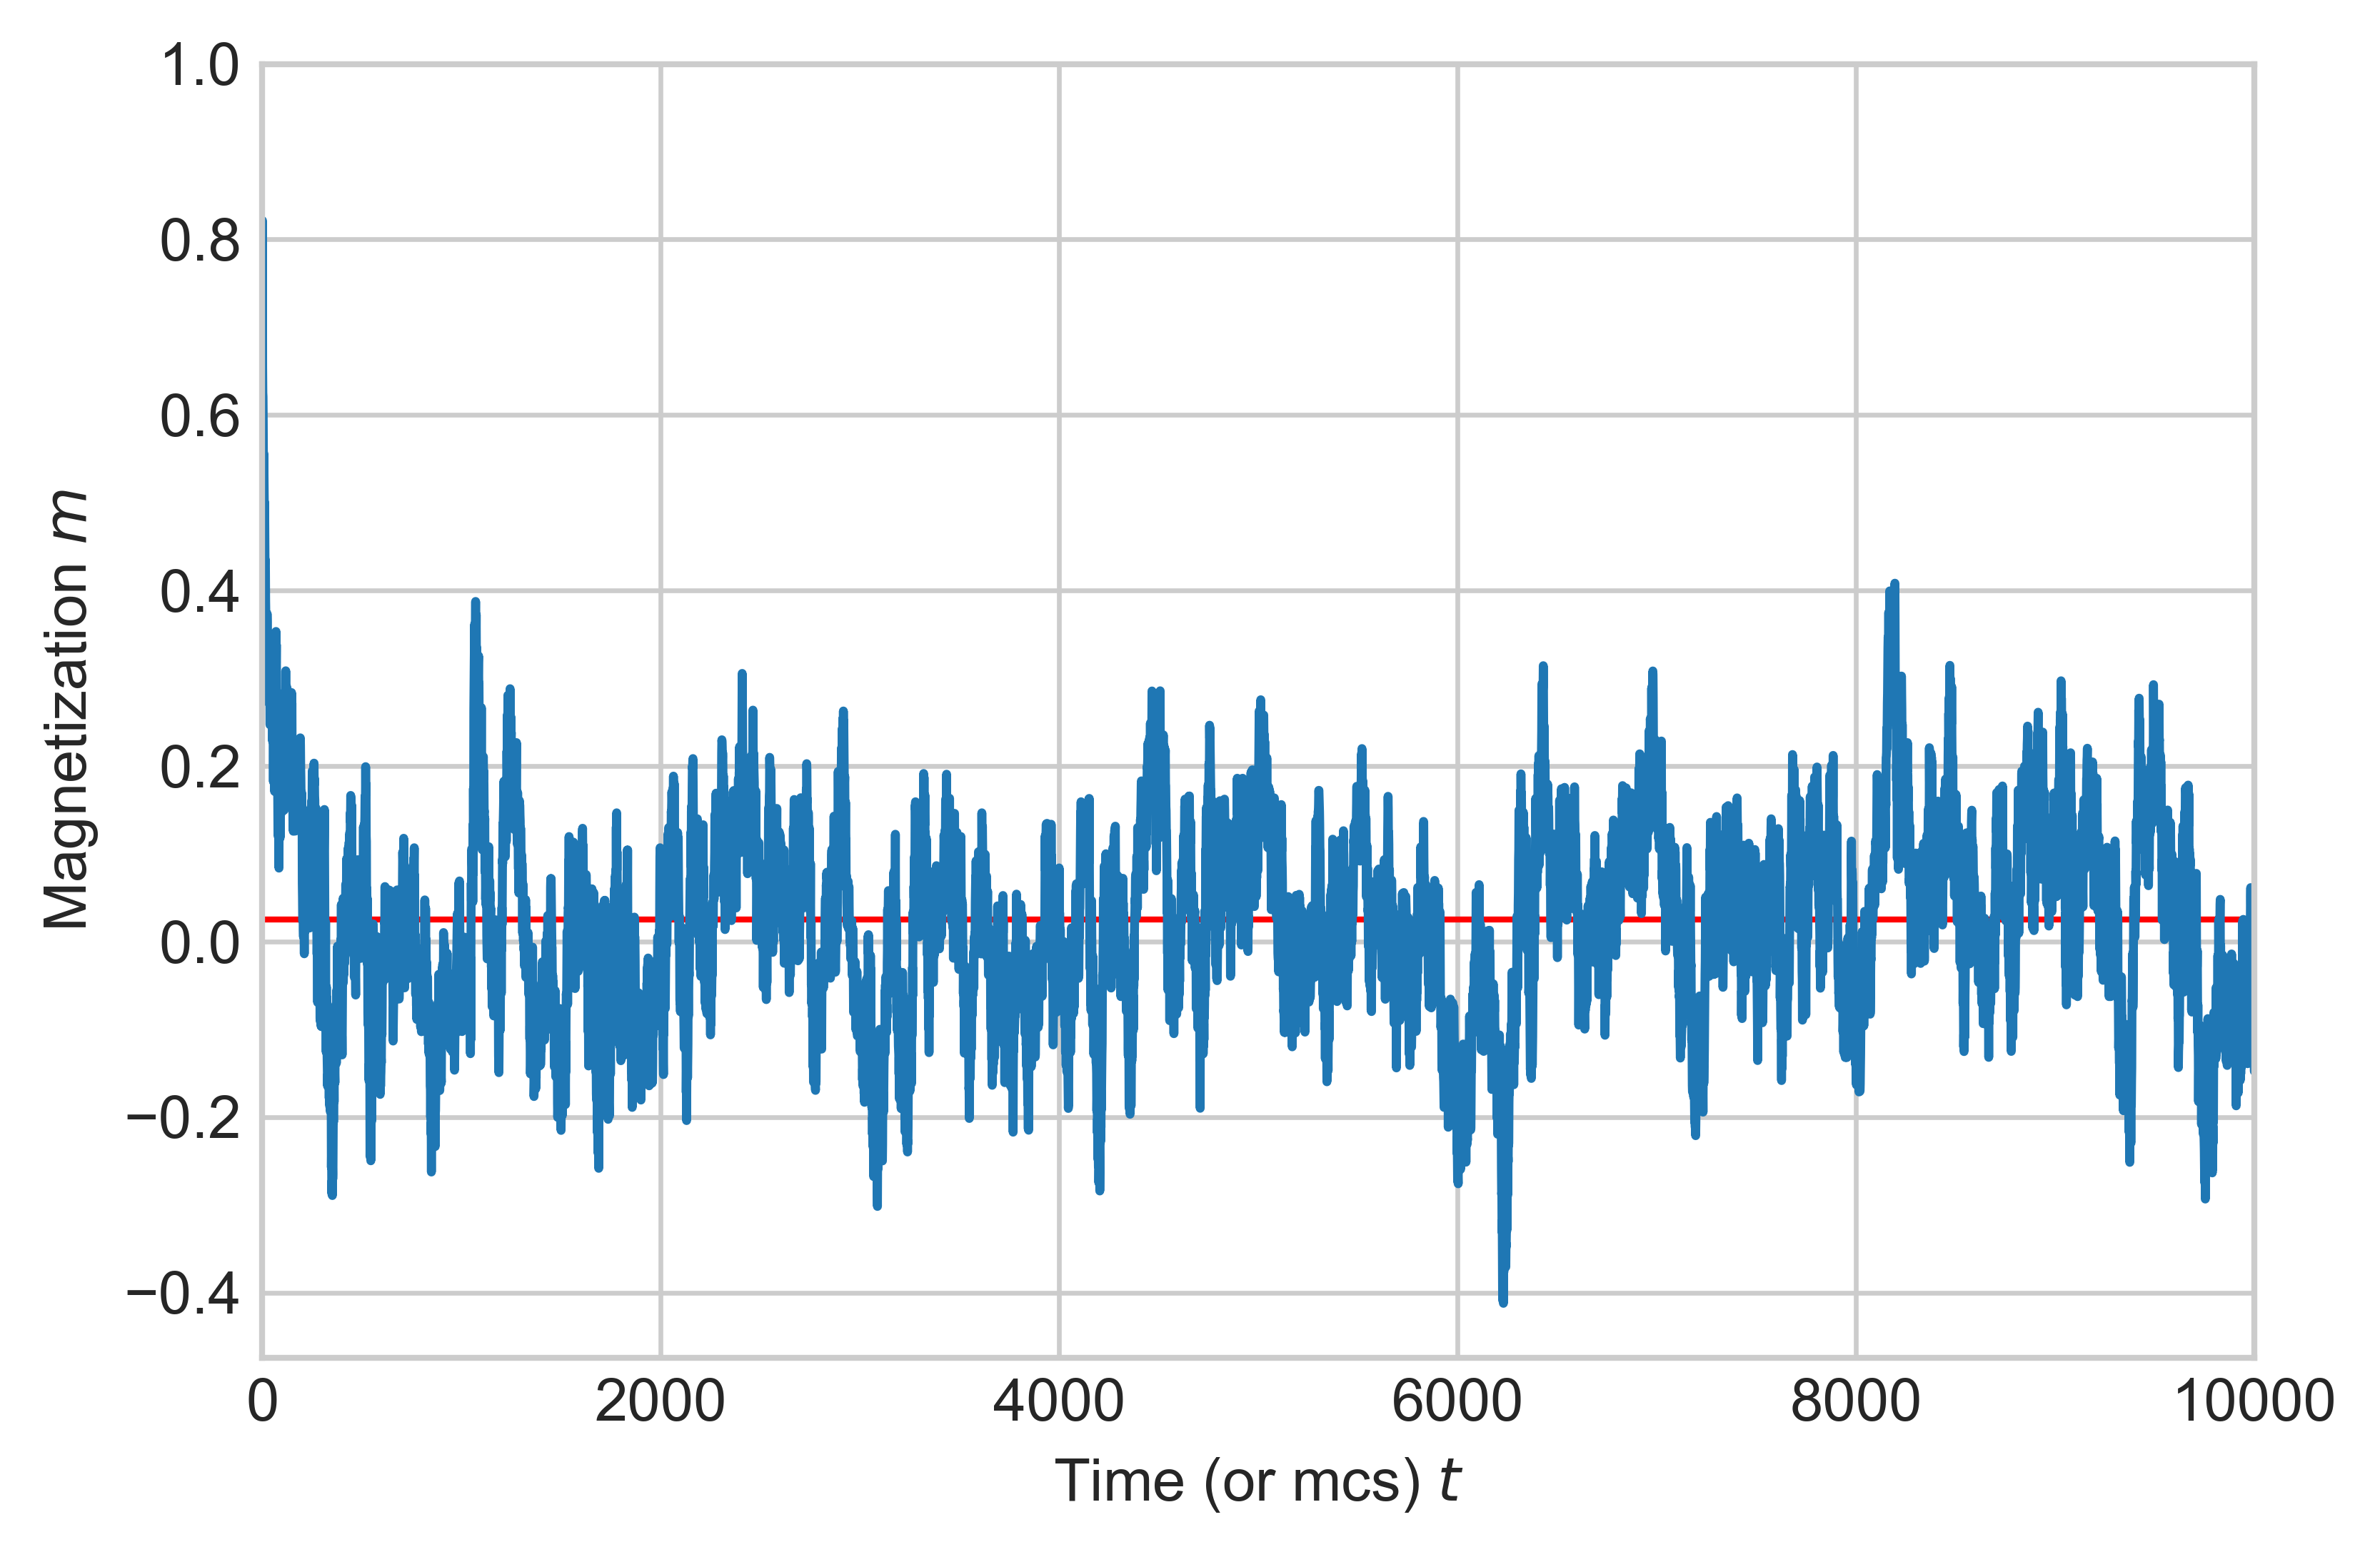

<m> is  0.024948520000000002


<Figure size 3600x2400 with 0 Axes>

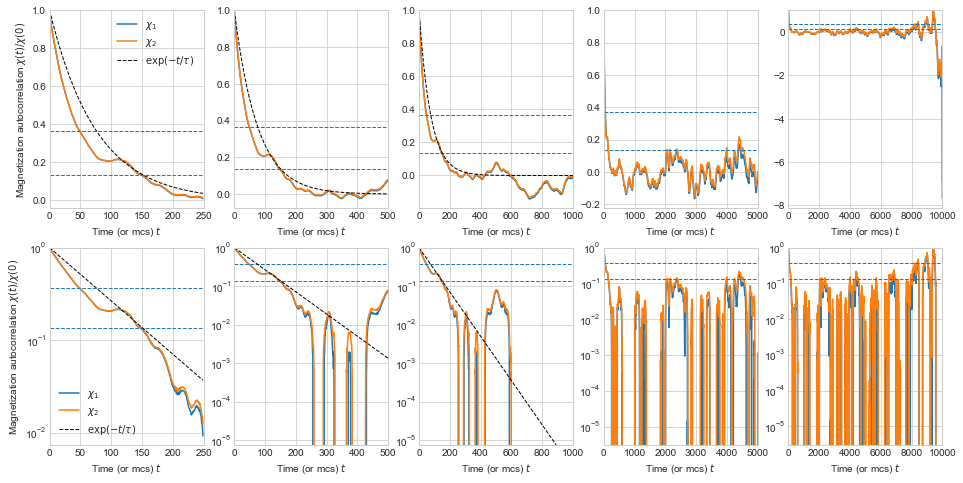

tau is 75.61739833400543


In [16]:
# isTinf = True, Pick Random site = True
exist, mag_fig5 = load_auto_data("Result/mag_fig5.txt")
if(not exist):
    mag_fig5 = __auto__(2.4,False,False)
    save_auto_data(mag_fig5,"Result/mag_fig5.txt")
tau_drawer_2(mag_fig5)

In [176]:
def tau_drawer_loading(path,abs = False, draw_fitting = [1,2,3], slice = [250,500,1000,5000,10000]):
    # file_stream = open("..\C++\Result\Metropolis_c_Error_100_int25_auto_"+str(1)+".csv",'r')
    file_stream = open(path,'r')
    # file_stream = open("..\C++\Result\Autocorrelation\Abs\Metropolis_c_Error_100_int25_auto_"+str(5)+".csv",'r')

    lines = file_stream.readlines()
    file_stream.close()
    __sample = np.array([np.array(line.strip().split(','),dtype=np.double) for line in lines],dtype=object)
    if(abs):
        __sample = np.abs(__sample)
    print(__sample)

    # __sample = __sample[:][0:1000]
    print(__sample.shape)
    __tTemp = 2.4
    i = 11
    print(__sample[i][0])
    auto_chi1 = chi1(__sample[i][1:])
    auto_chi2 = chi2(__sample[i][1:])
    tau_drawer(__sample[i][1:],auto_chi1,auto_chi2,draw_fitting=draw_fitting, slice=slice)

[[0.2 1.0 1.0 ... 1.0 1.0 1.0]
 [0.4 1.0 1.0 ... 1.0 1.0 1.0]
 [0.6 1.0 1.0 ... 1.0 1.0 1.0]
 ...
 [4.6 0.442 -0.198 ... 0.0008 0.0202 0.0164]
 [4.8 0.3708 -0.2664 ... 0.0086 -0.0106 0.0028]
 [5.0 0.354 -0.2938 ... 0.0188 0.0112 0.0172]]
(25, 10001)
2.4


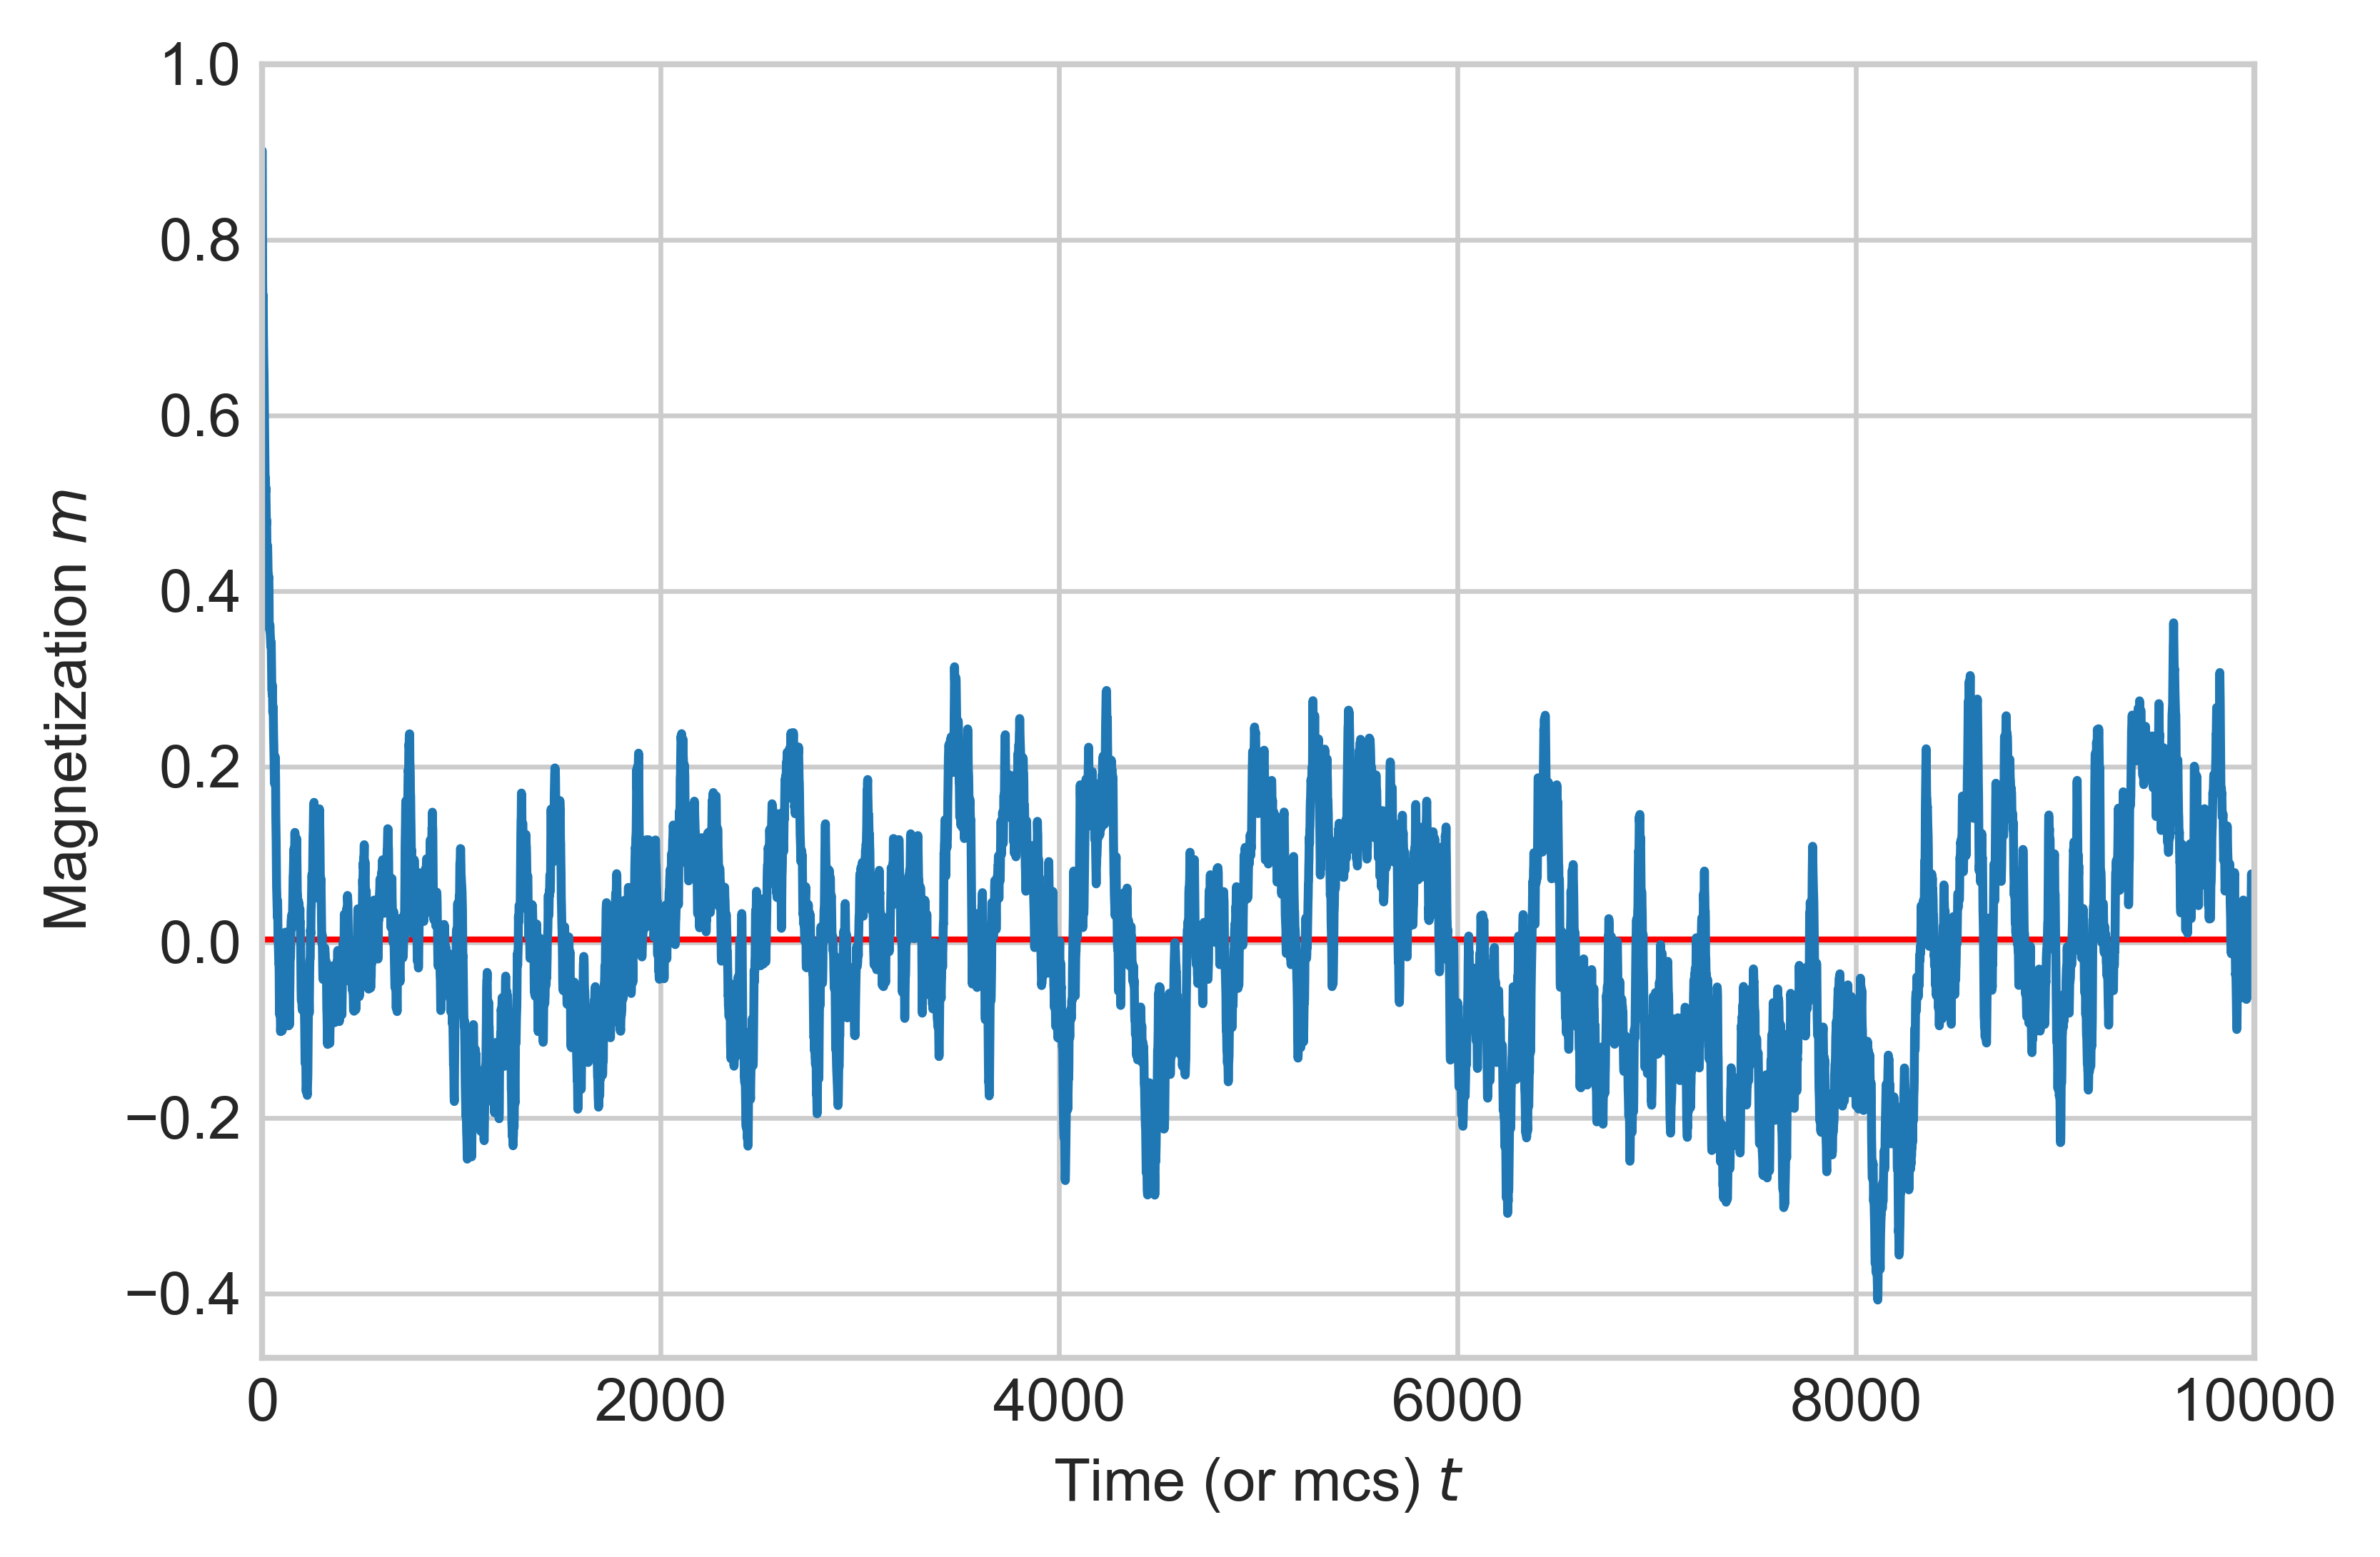

<m> is  0.0031556800000000136


<Figure size 3600x2400 with 0 Axes>

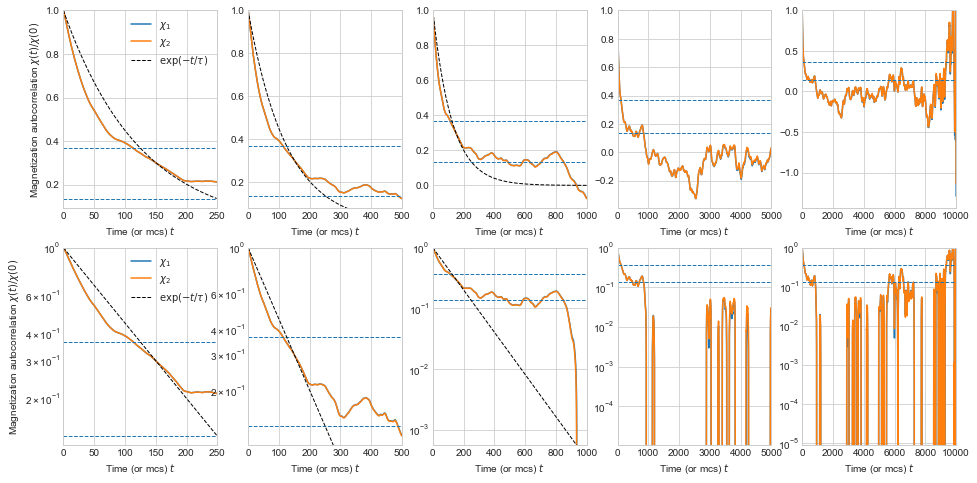

tau is 124.8822930958396


In [31]:
tau_drawer_loading("..\C++\Result\Metropolis_c_Error_100_int25_auto_"+str(2)+".csv")

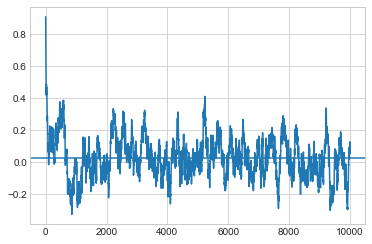

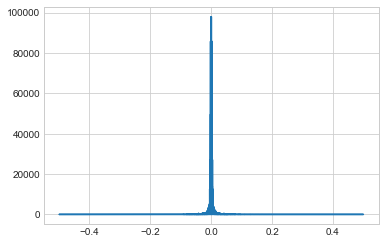

[ 0.      0.0001  0.0002 ... -0.0003 -0.0002 -0.0001]
[1.41651069e-27 5.63140387e+03 1.61219746e+03 ... 1.60118581e+04
 1.61219746e+03 5.63140387e+03]
0.026780400000000003
0.015604954447839998
9.077313834038096e-26


C:\Users\Seongsu\anaconda3\envs\pyenv395\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


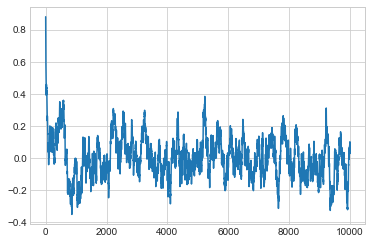

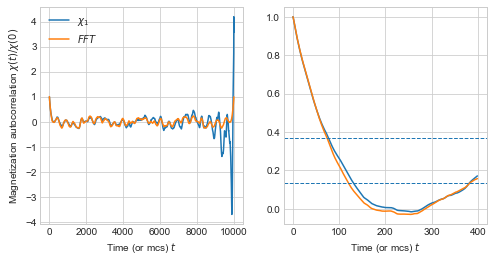

<Figure size 3600x2400 with 0 Axes>

In [62]:
def FFT_ploting(fmlist):
    ## FFT
    plt.style.use('seaborn-whitegrid')
    plt.plot(np.arange(0,len(fmlist)),fmlist)
    # plt.plot(np.arange(0,epoch),mlist**2)
    plt.axhline(np.average(fmlist))
    plt.show()

    # fmlist = np.append(fmlist,np.array([np.average(fmlist)]*10000))

    length = len(fmlist) # length of list


    mp = (fmlist)[:length] - np.average(fmlist[:length])
    fft_chi = abs(np.fft.fft(mp))**2
    frequency = np.fft.fftfreq(len(mp),1)

    plt.style.use('seaborn-whitegrid')
    plt.plot(frequency,fft_chi)
    plt.show()

    susep = np.average(fmlist[:length]**2)-np.average(fmlist[:length])**2
    print(frequency)
    print(fft_chi)
    print(np.average(fmlist[:length]))
    print(susep)
    print(fft_chi[0]/susep)
    
    #Recover FFT : complex form?

    chi_inv = np.fft.ifft(np.fft.fft(mp))
    plt.plot(np.arange(0,length),chi_inv)
    plt.show()

    chi_inv = np.fft.ifft(fft_chi)
    auto_chi = chi1(fmlist)

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.plot(np.arange(0,length),auto_chi/auto_chi[0],label="$\chi_1$")
    plt.plot(np.arange(0,length),chi_inv.real/chi_inv.real[0],label="$FFT$")
    plt.ylabel('Magnetization autocorrelation $\chi(t)/\chi(0)$')
    plt.xlabel('Time (or mcs) $t$')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0,400),auto_chi[0:400]/auto_chi[0],label="$\chi_1$")
    plt.plot(np.arange(0,400),chi_inv[:400].real/chi_inv.real[0],label="$FFT$")
    plt.axhline(1/np.e,linestyle='--',lw=1)
    plt.axhline(1/np.e**2,linestyle='--',lw=1)
    plt.xlabel('Time (or mcs) $t$')
    plt.figure(dpi=600)

    plt.show()

FFT_ploting(mag_fig2) 

In [166]:
## FFT를 이용해서 Metropolis algorithms의 tau의 그래프를 그릴 거임

def find_fft_tau_data(num, path, isWolff = False, abs = False, useStepSize = False):
    # 1. Data를 받아서 정리하는 영역
    file_stream = open(path + str(num) + '.csv',"r")
    lines = file_stream.readlines()
    file_stream.close()
    step_size = 1
    
    if(not isWolff):
        fft_tau_data = np.array([np.array(line.strip().split(',')[1:],dtype=np.double) for line in lines],dtype=object)
    if(isWolff):
        fft_tau_data = np.array([np.array(line.strip().split(',')[1:],dtype=np.double) for line in lines],dtype=object)
        if(useStepSize):
            step_size = np.array([fft_tau_data[i][-1] for i in range(25)])
        fft_tau_data = np.array([fft_tau_data[i][:-1] for i in range(25)])
    if(abs) : fft_tau_data = np.abs(fft_tau_data)


    res = np.zeros(25)
    # 2. Data에 FFT와 IFFT를 가하는 영역
    length = 10000
    for i in range(25):
        tau_data_mp = (fft_tau_data[i])[:length] - np.average(fft_tau_data[i][:length])
        tau_data_fft_chi = np.abs(np.fft.fft(tau_data_mp))**2
        # frequency = np.fft.fftfreq(len(tau_data_mp),1)
        tau_data_fft_chi_inv = np.fft.ifft(tau_data_fft_chi).real
        tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)
        # print(tau_data_fft_chi_inv.shape)


        # 3. Data에서 1/e가 되는 값을 찾음
        e1 = 1/np.e
        for j in range(length):
            if(tau_data_fft_chi_inv[j] < e1):
                tau = j
                res[i] = tau
                break
        # print(tau)
    if(isWolff):
        res = res*step_size
    return res

def plot_chi_time(tau_data_avg, tau_data_dev_sqrt,start = 0.2, fin=5, bin=25):
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    xx = np.linspace(start,fin,bin)
    plt.plot(xx,tau_data_avg,marker = 's',color='b',label='Teq')
    plt.fill_between(xx,tau_data_avg+tau_data_dev_sqrt,tau_data_avg-tau_data_dev_sqrt,alpha=0.4)
    # plt.xlim(0,5)
    _, ymax = plt.ylim(None)
    # plt.ylim(-10,350)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])



    plt.ylabel('equilrbrium step Teq')
    plt.xlabel('Temperature T')
    if(start == 0.2 and fin == 5): 
        plt.text(0.05,ymax-3*ymax/50,"100 $\\times$ 100 lattice")
        plt.text(0.06,ymax-6*ymax/50,"20000 steps per site")
        plt.text(0.06,ymax-9*ymax/50,"8 samples of single-spin flip ")
    # plt.text(2.5,183,"185.9$\pm$55")
    # plt.text(2.27,-25, '$T_c$', ha='center')
    plt.legend()
    plt.show()

def tau_data_process(path, num = 8, isWolff = False, abs = False, useStepSize=False):
    tau_data = np.array([find_fft_tau_data(i+1,path,isWolff=isWolff,abs=abs,useStepSize=useStepSize) for i in range(num)])

    # https://ko.wikipedia.org/wiki/%EB%B6%84%EC%82%B0

    tau_data_avg = tau_data.sum(0)/tau_data.shape[0]
    tau_data_dev = (tau_data**2-(np.array([tau_data_avg for i in range(tau_data.shape[0])]))**2).sum(0)/7
    tau_data_dev_sqrt = np.sqrt(tau_data_dev)
    print(tau_data_avg)
    print(tau_data_dev_sqrt)
    return tau_data_avg, tau_data_dev_sqrt

C:\Users\Seongsu\AppData\Local\Temp/ipykernel_20760/384328635.py:26: RuntimeWarning: invalid value encountered in true_divide
  tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)


[ 0.     0.     1.     1.     1.     1.     1.     1.     2.     3.
 28.375 38.25   6.875  3.625  2.375  2.     2.     1.875  1.     1.
  1.     1.     1.     1.     1.   ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         14.54979136  6.22781778
  0.35355339  0.51754917  0.51754917  0.          0.          0.35355339
  0.          0.          0.          0.          0.          0.
  0.        ]


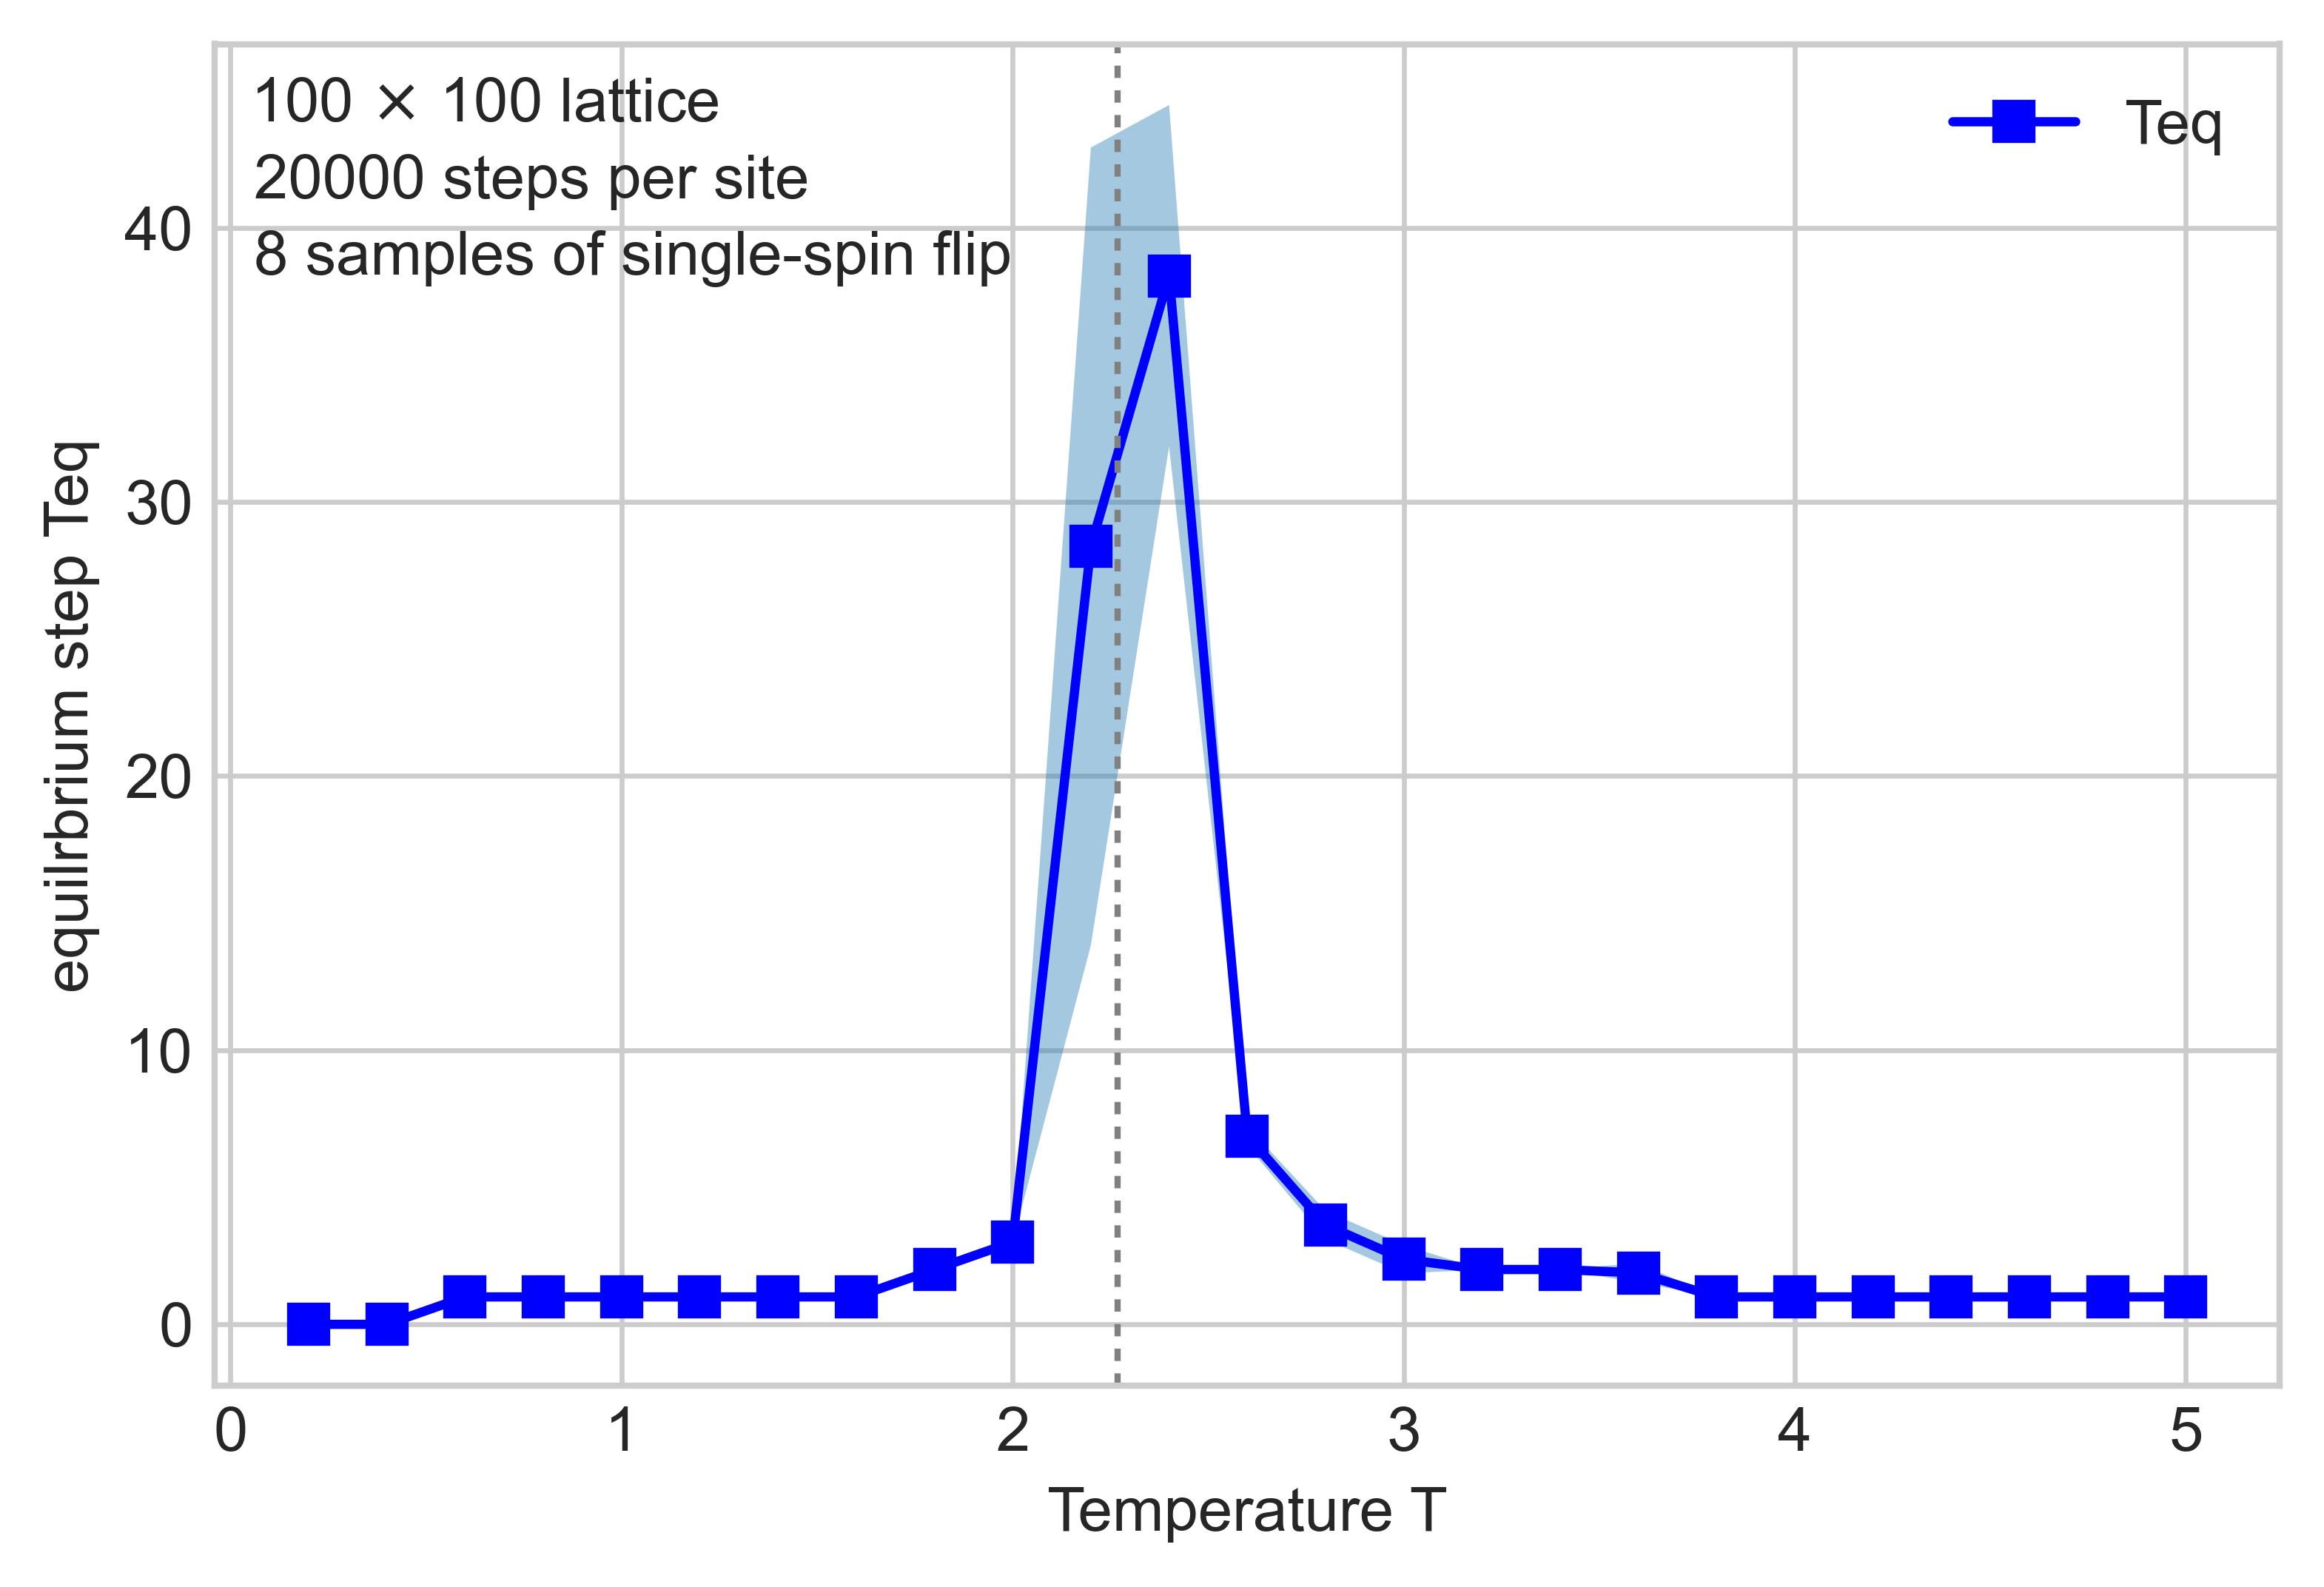

C:\Users\Seongsu\AppData\Local\Temp/ipykernel_20760/384328635.py:26: RuntimeWarning: invalid value encountered in true_divide
  tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)


[ 0.     0.     1.     1.     1.     1.     1.     1.     2.     3.
 28.375 79.125 12.75   6.     4.     3.     2.     2.     2.     2.
  2.     1.25   1.     1.     1.   ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         14.54979136 16.53945499
  0.70710678  0.          0.          0.          0.          0.
  0.          0.          0.          0.46291005  0.          0.
  0.        ]


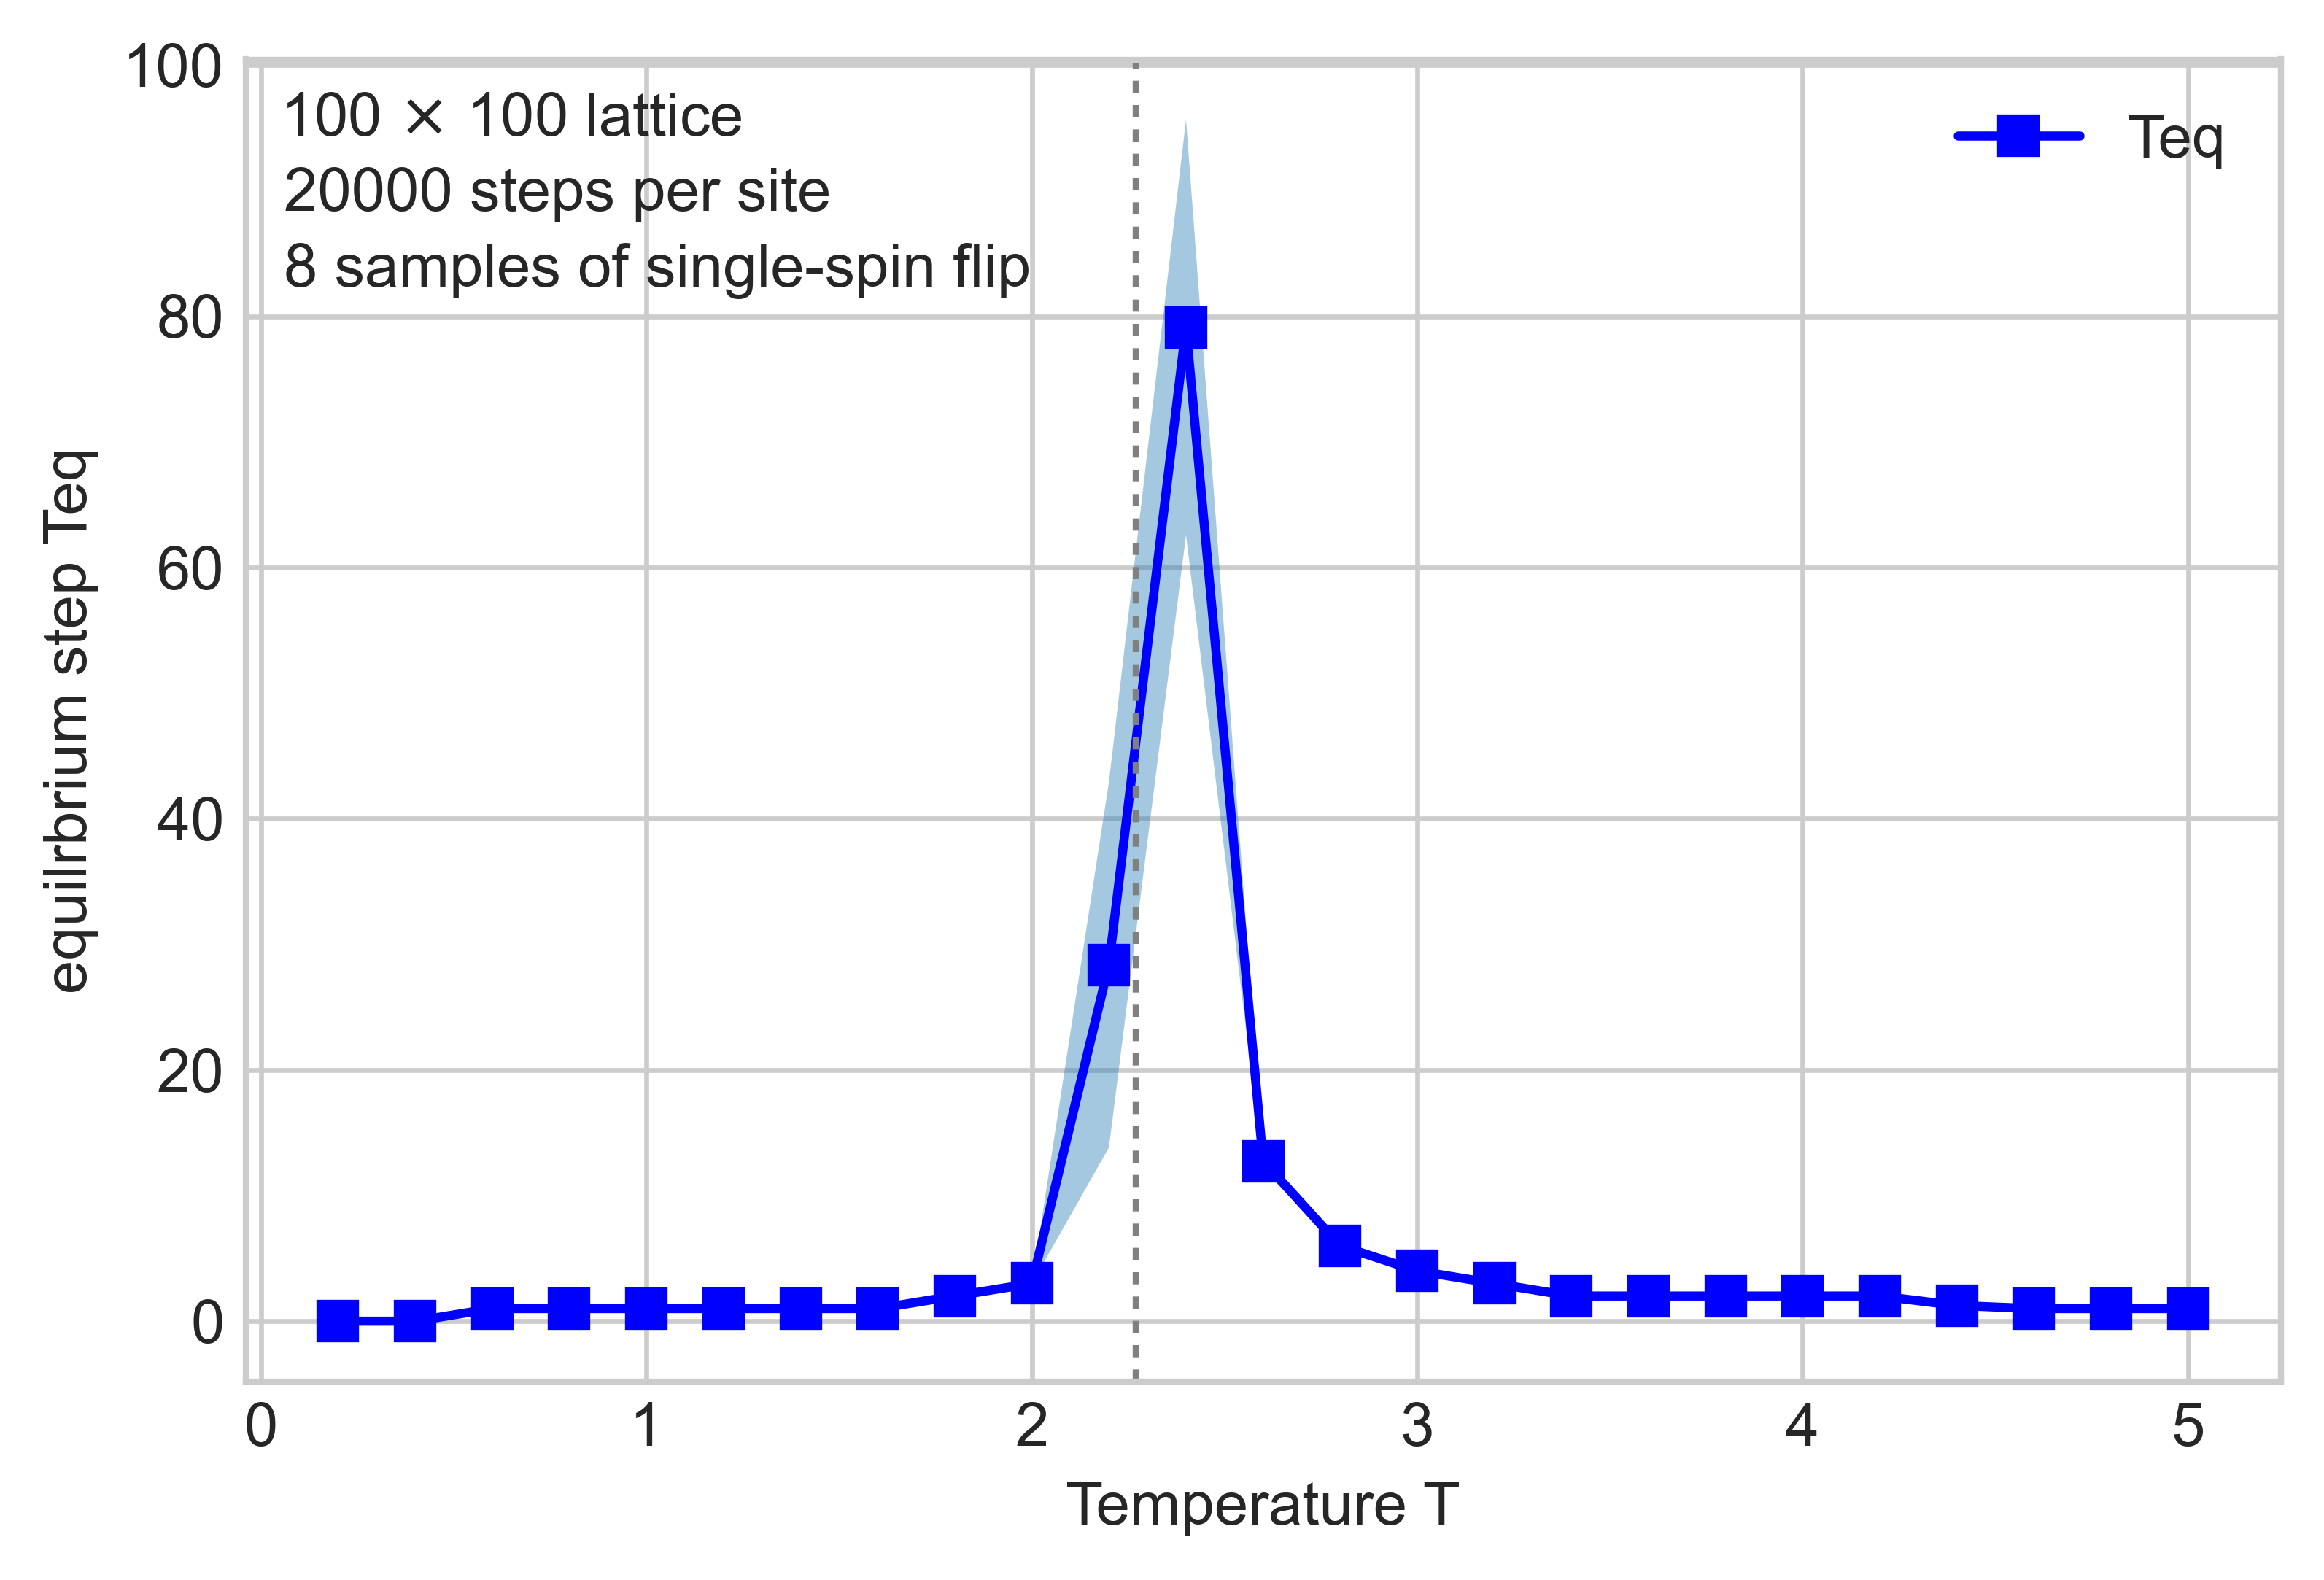

In [162]:
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Metropolis_c_Error_100_int25_auto_",abs=True)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt)
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Metropolis_c_Error_100_int25_auto_",abs=False)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt)

C:\Users\Seongsu\AppData\Local\Temp/ipykernel_20760/718753292.py:20: RuntimeWarning: invalid value encountered in true_divide
  tau_data_fft_chi_inv = tau_data_fft_chi_inv/max(tau_data_fft_chi_inv)


[0.00000e+00 1.25000e-01 1.62500e+00 1.87500e+00 2.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 3.12500e+00 7.12500e+00 7.28750e+01 2.78625e+02
 5.05000e+01 2.27500e+01 1.28750e+01 9.00000e+00 6.87500e+00 5.75000e+00
 5.00000e+00 4.00000e+00 4.00000e+00 3.00000e+00 3.00000e+00 3.00000e+00
 2.87500e+00]
[ 0.          0.35355339  0.51754917  0.35355339  0.          0.
  0.          0.          0.35355339  0.35355339 36.35710777 86.90378506
  9.16515139  2.43486579  0.83452296  0.75592895  0.35355339  0.46291005
  0.          0.          0.          0.          0.          0.
  0.35355339]


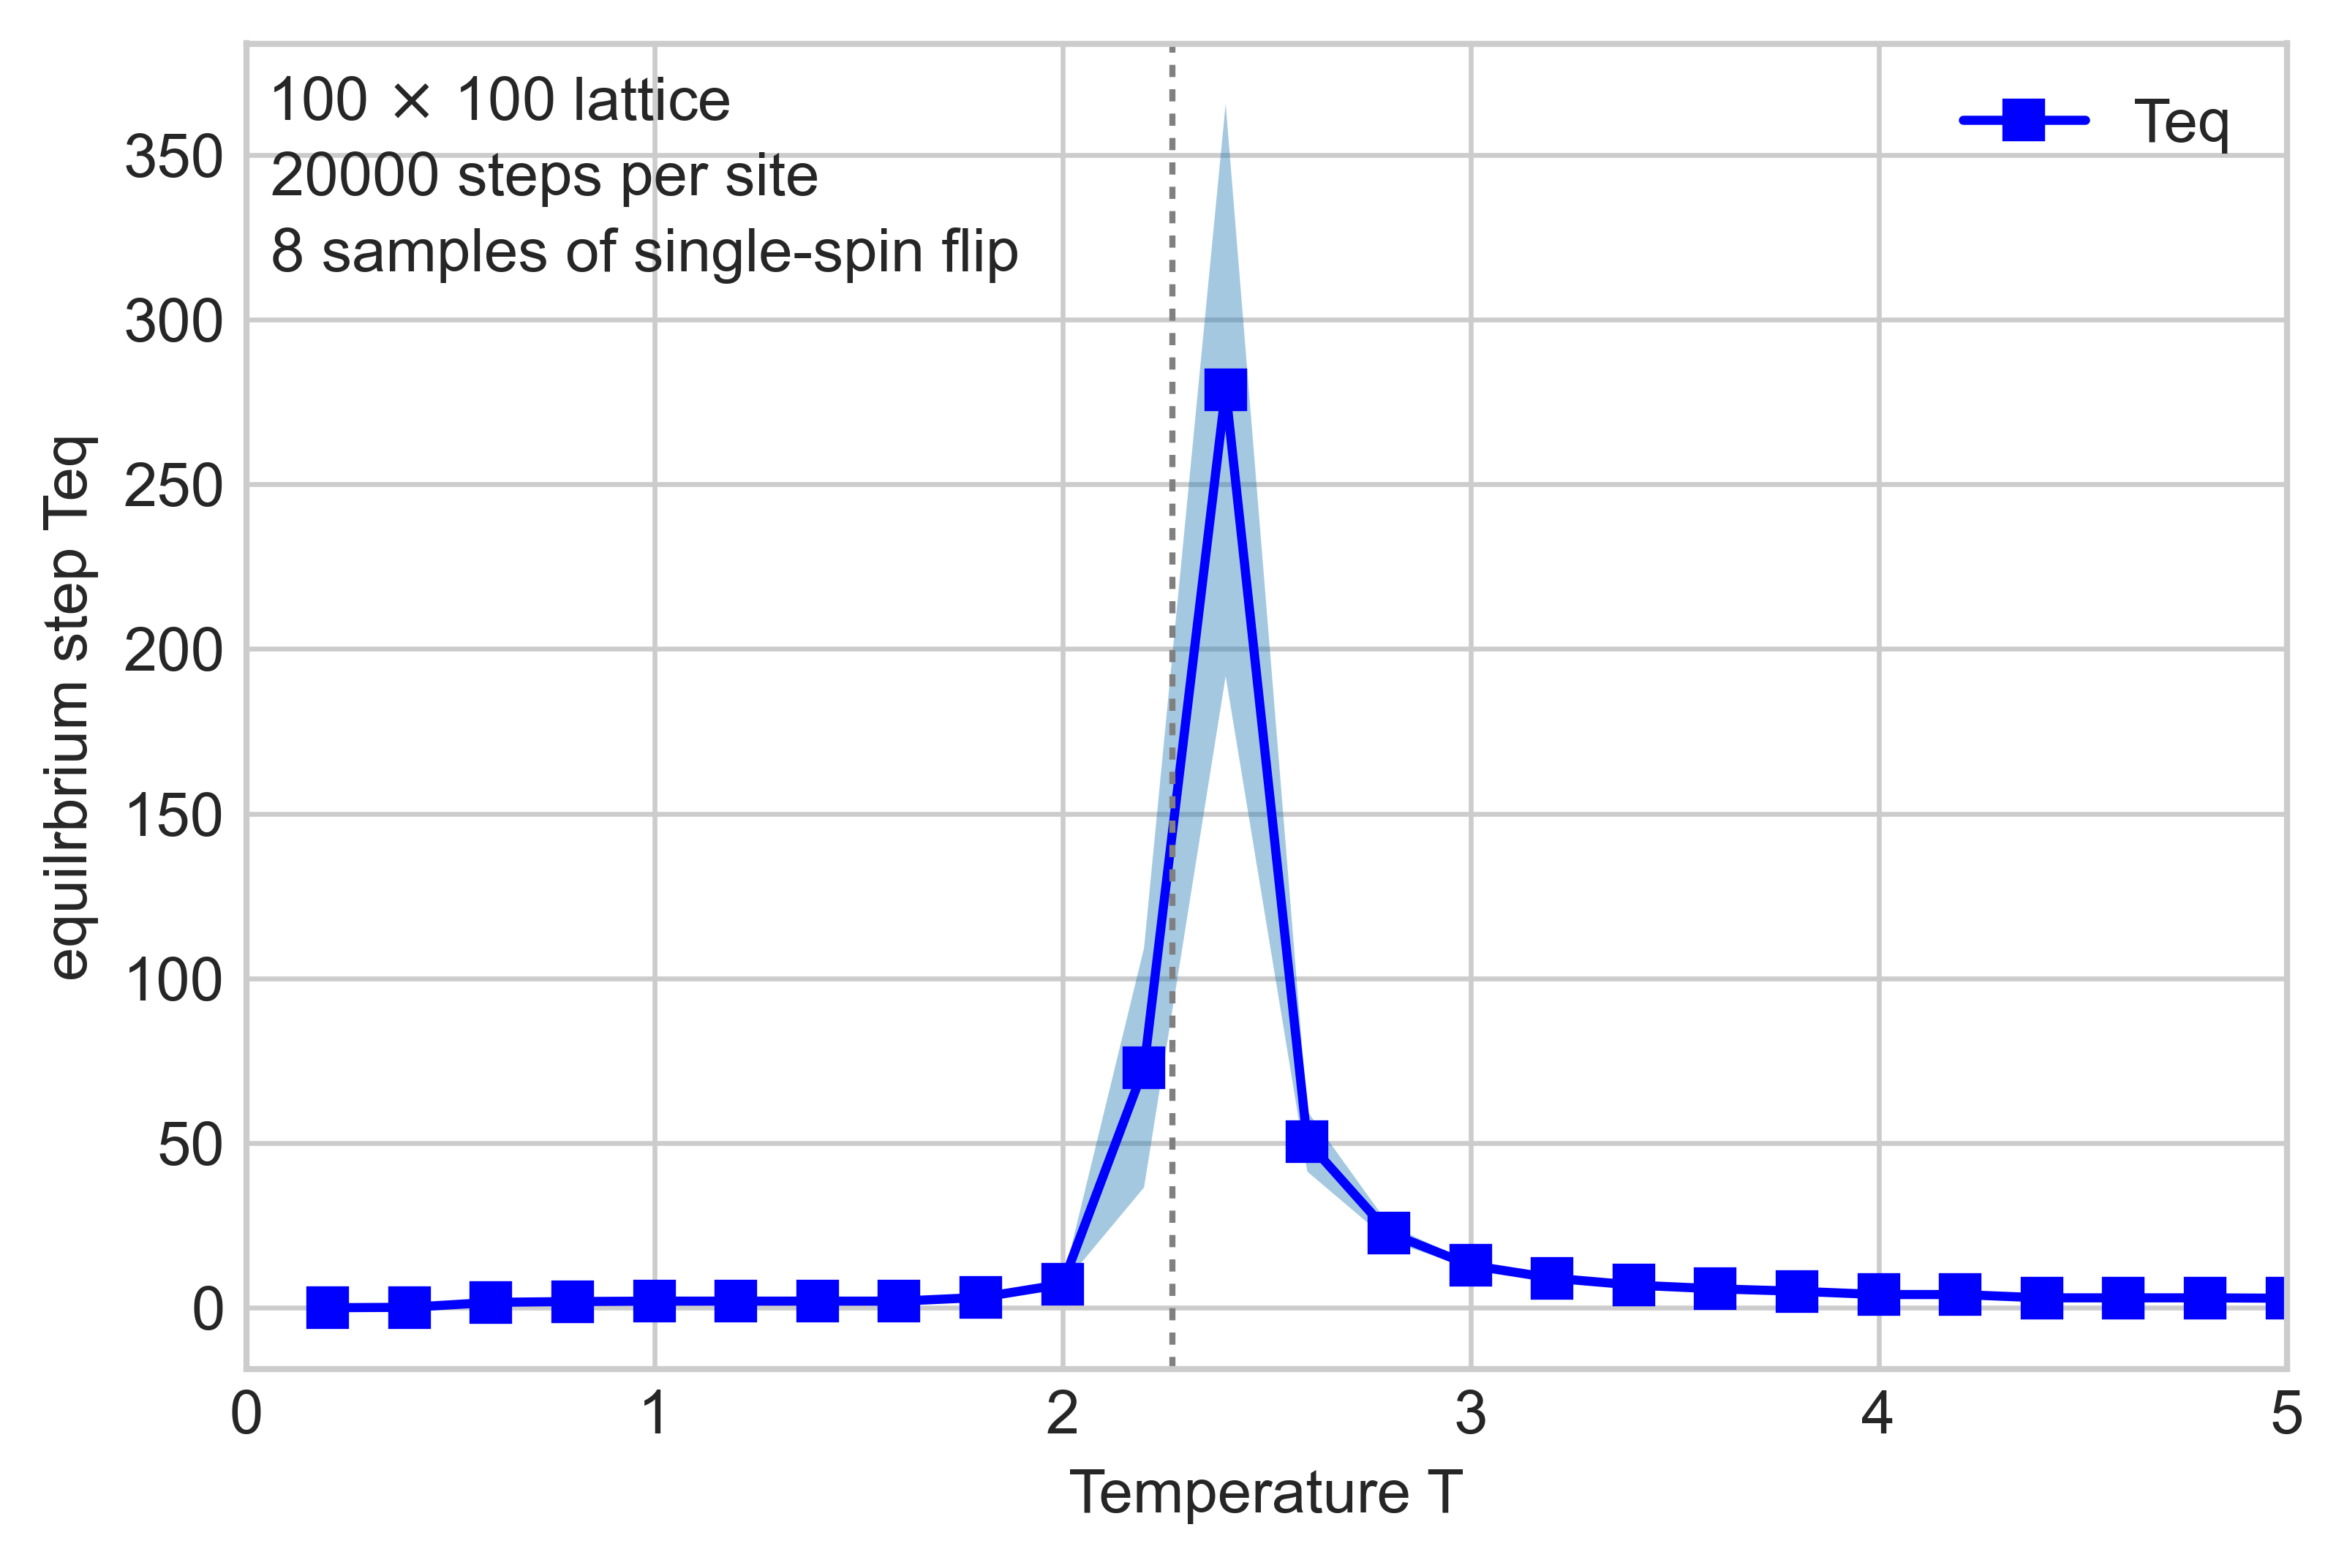

In [66]:
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Autocorrelation\Metropolis_c_Error_100_int25_auto_")
plot_chi_time(tau_data_avg, tau_data_dev_sqrt)

[  22.5     38.25    41.75    61.125   70.5     79.5    146.     128.
  648.375  923.625 1177.375 1032.5   1070.     566.5    485.25   407.625
  286.875  210.5    212.875  152.125  116.5    130.875  116.      86.5
   90.5  ]
[  8.83176087  11.18353381  20.25374745  12.58613182  37.93227047
  26.4250963   85.87199776  50.95095681 567.69155043 549.62219167
 358.55939436 523.61763585 338.50174087 246.13352938 205.11651741
 175.04769758  96.23548128  71.73164275  80.90989256  39.16790778
  20.12106217  31.24757133  32.28887469  14.20261545  45.02063019]


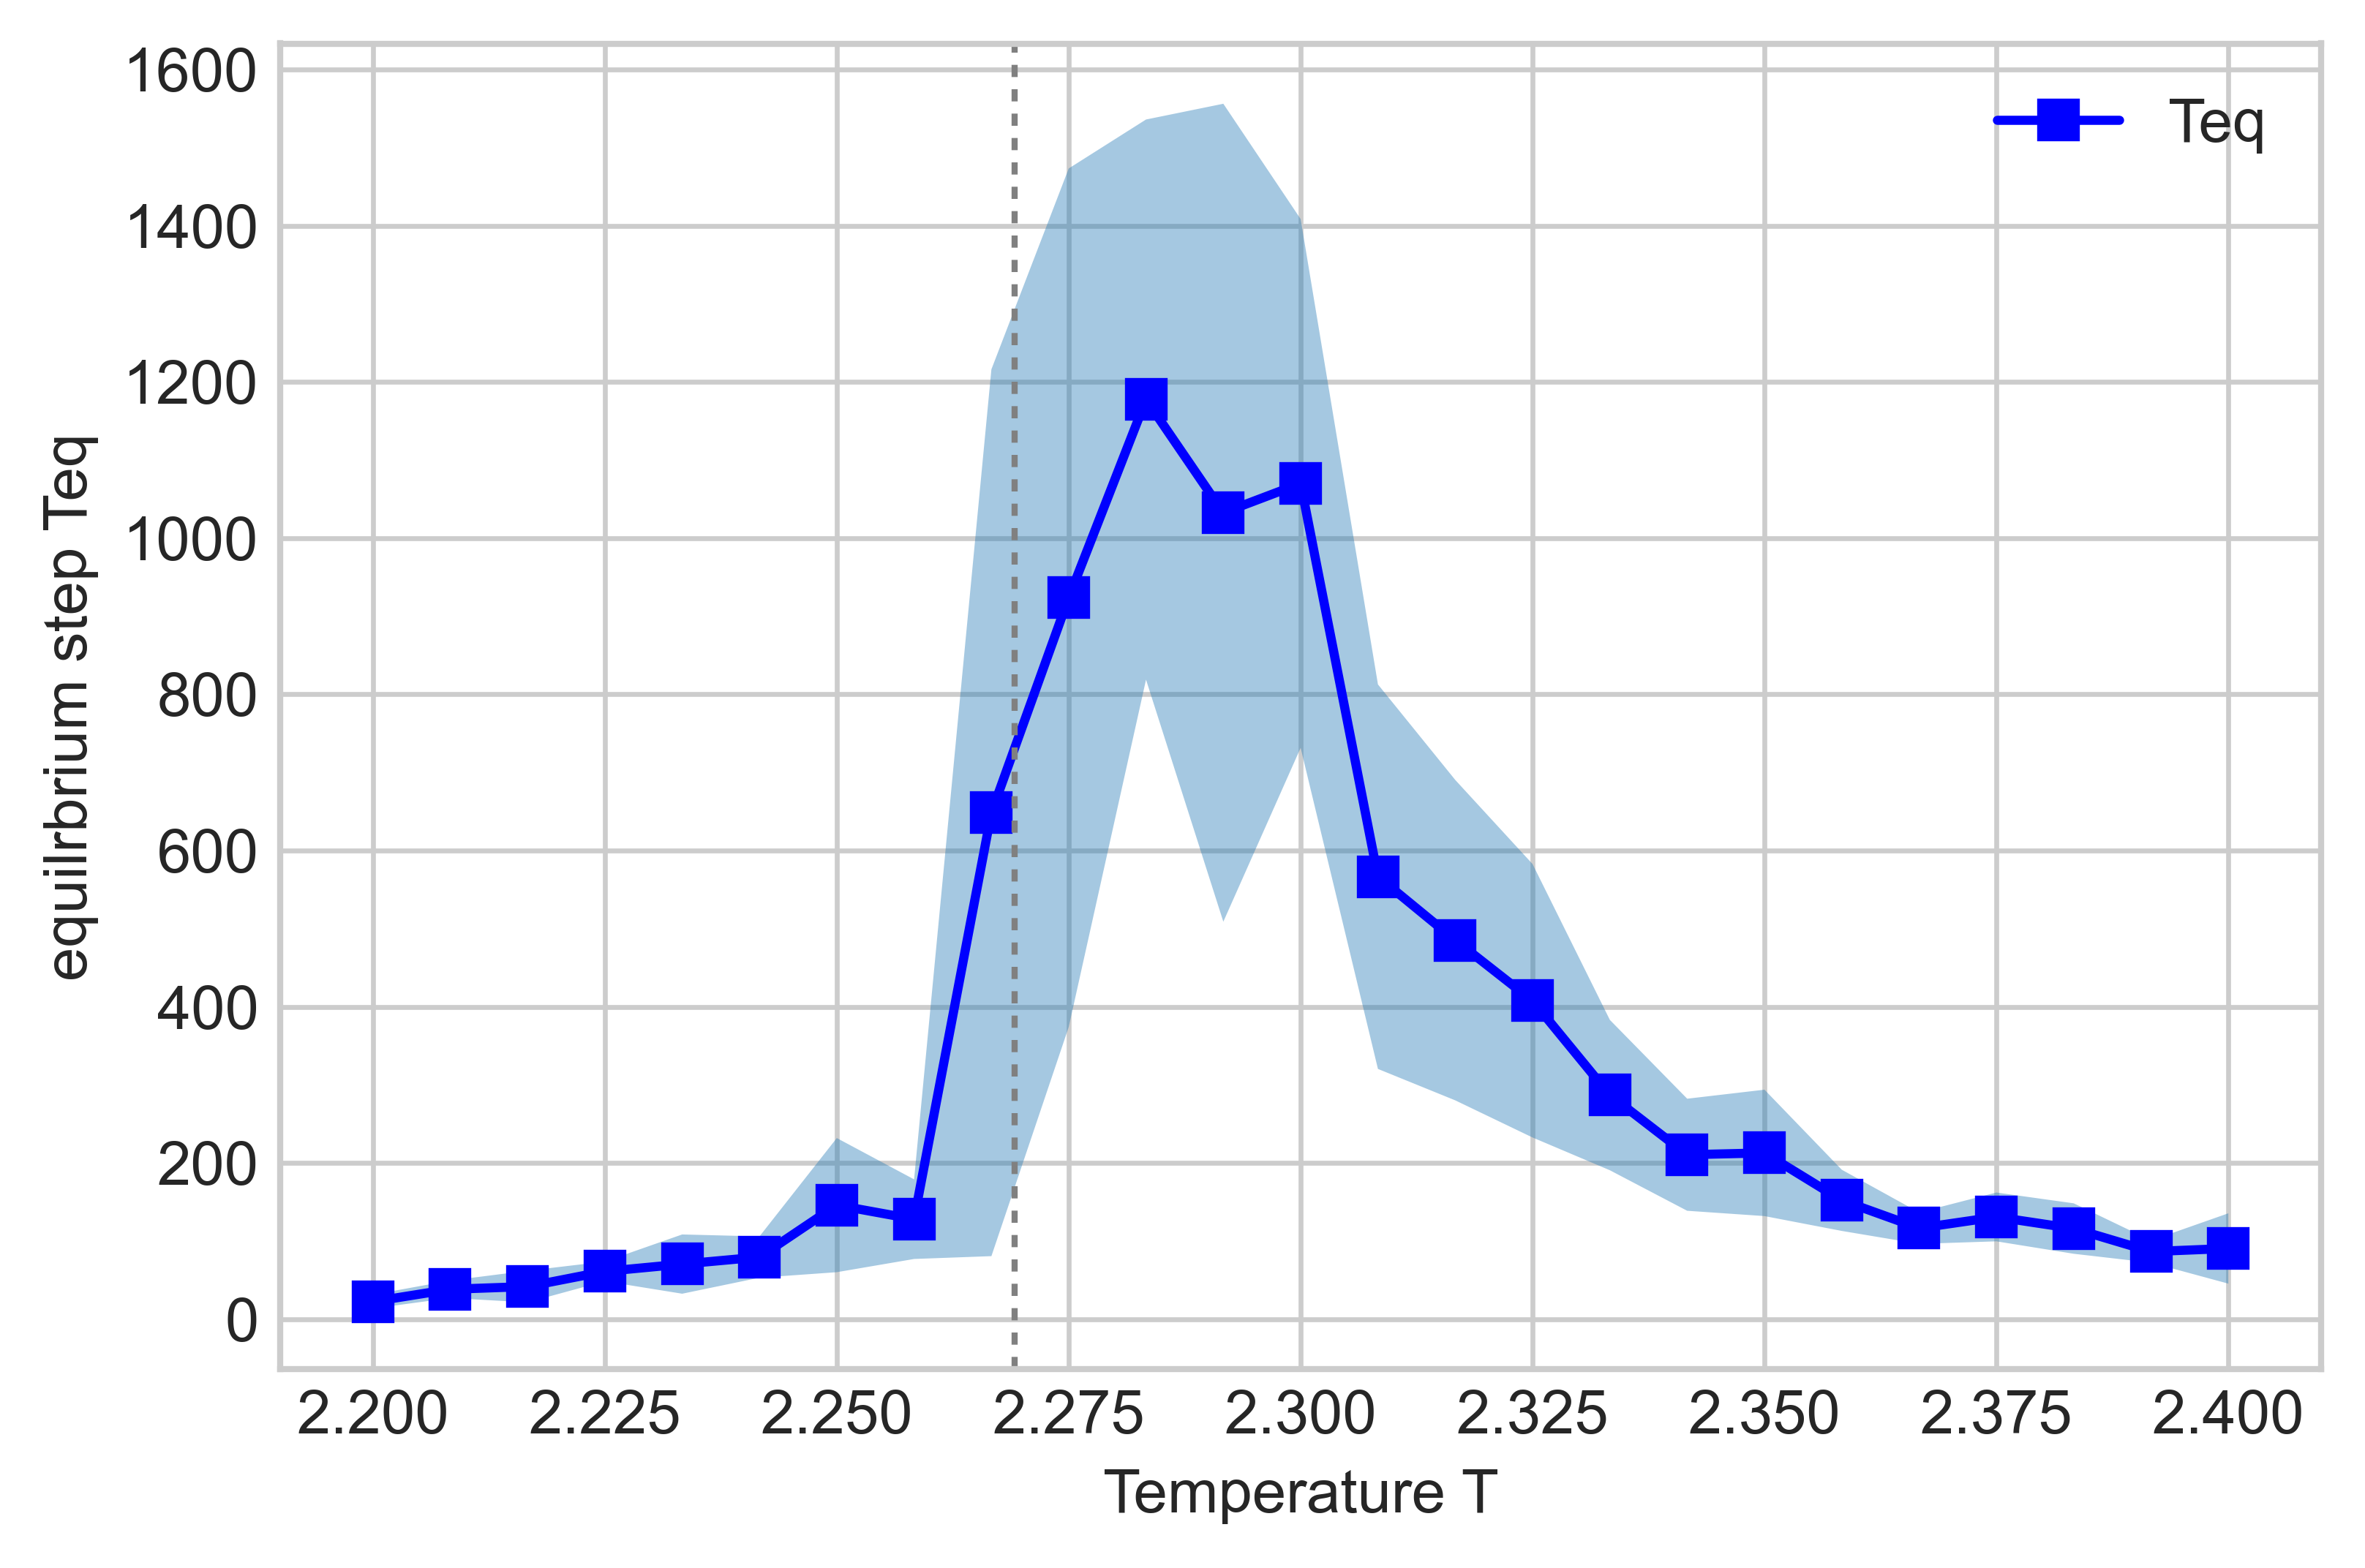

In [126]:
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Metro_Result\Metropolis_c_Error_100_int25_auto3_",8)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt,2.2,2.4,25)


C:\Users\Seongsu\AppData\Local\Temp/ipykernel_20760/3831449998.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fft_tau_data = np.array([fft_tau_data[i][:-1] for i in range(25)])


[0.61700913 0.60363038 0.5764925  0.55578763 0.527997   0.4984635
 0.460649   0.41782412 0.35997    0.30491337 0.24164288 0.184083
 0.14083313 0.10684013 0.16206415 0.12824473 0.14515833 0.12482876
 0.14034625 0.13084366 0.12723463 0.13409985 0.13191629 0.13532797
 0.14077864]
[0.00608338 0.0043257  0.00851361 0.00666689 0.00384731 0.0063305
 0.00763279 0.00757781 0.00638421 0.00448117 0.00892083 0.00718248
 0.00244016 0.00302592 0.00471411 0.00231818 0.01716394 0.0025858
 0.00204711 0.01489092 0.00189169 0.00161687 0.01380427 0.01515395
 0.01243094]


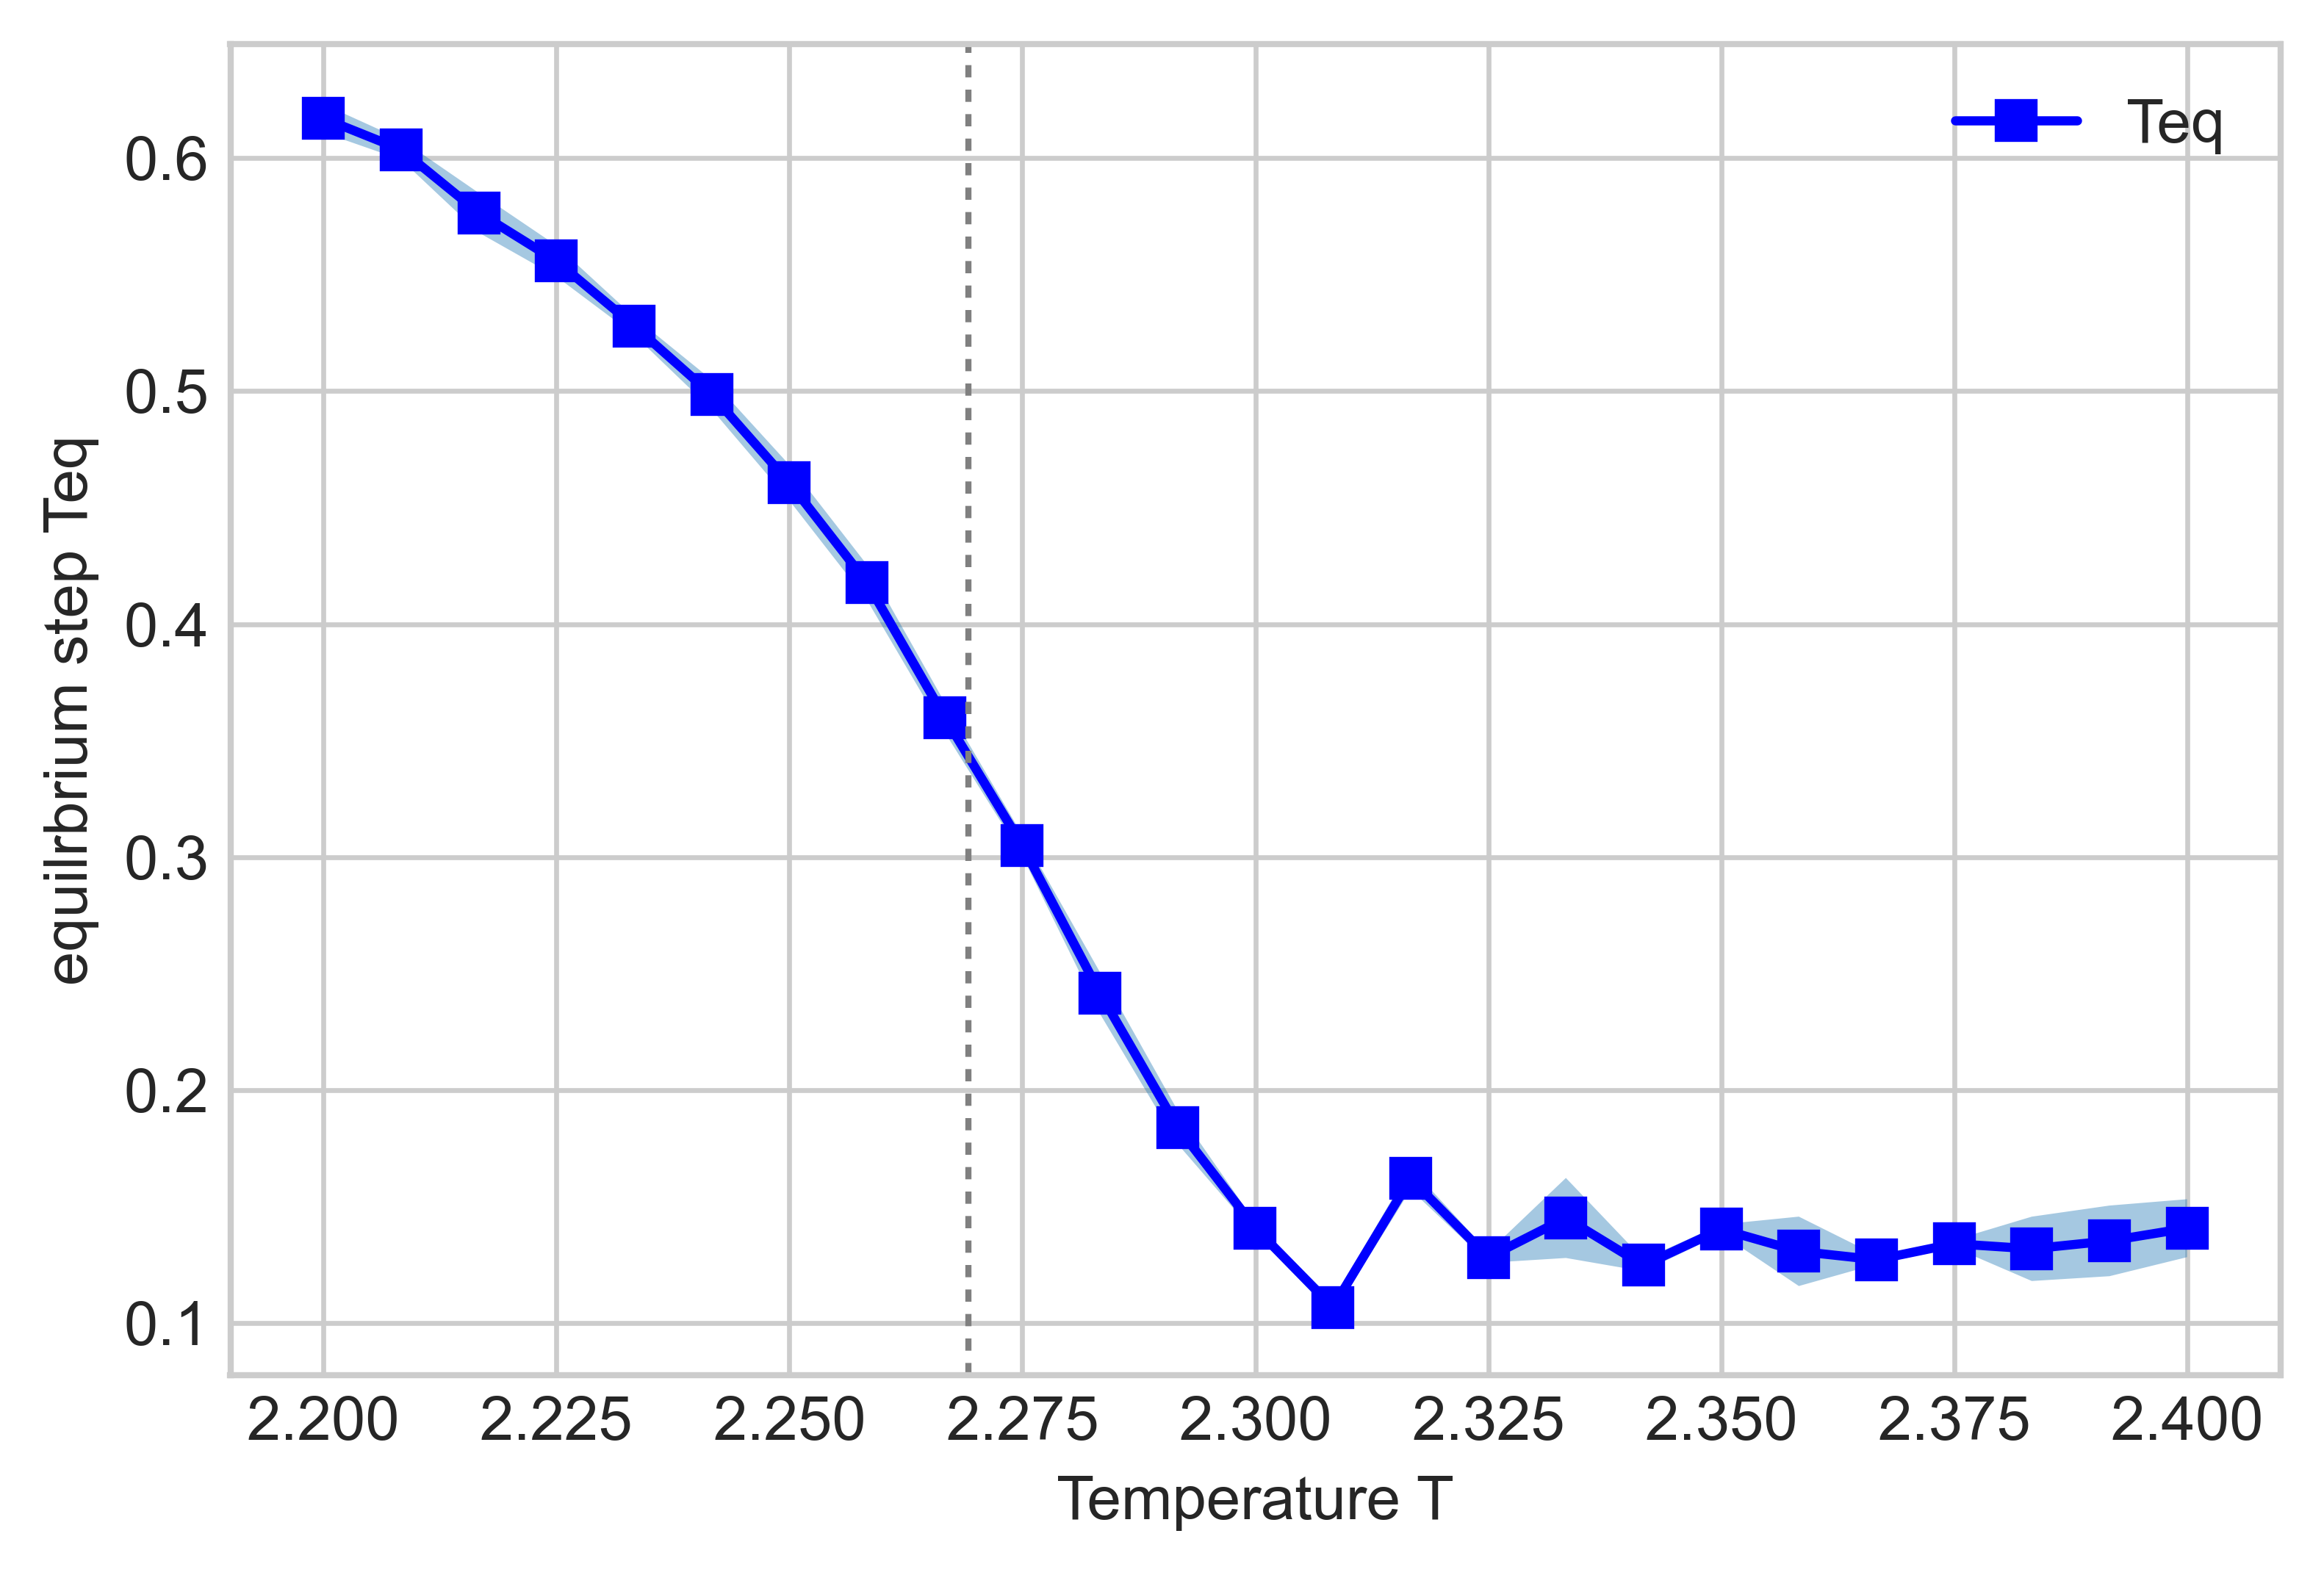

C:\Users\Seongsu\AppData\Local\Temp/ipykernel_20760/3831449998.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fft_tau_data = np.array([fft_tau_data[i][:-1] for i in range(25)])


[1.23401825 1.28231913 1.2271785  1.3178265  1.45225388 1.55729812
 1.55318163 1.41008662 1.48385125 1.2196535  1.05553375 0.78138038
 0.5633325  0.41415325 0.25350721 0.20040108 0.16402444 0.13006934
 0.12715148 0.11595562 0.1017877  0.09213365 0.09036356 0.08514264
 0.08014274]
[0.01216675 0.20990354 0.22385721 0.27526613 0.24612678 0.17222549
 0.22758615 0.21716385 0.11324005 0.01792468 0.11416717 0.07875515
 0.00976066 0.04104503 0.03283524 0.02316655 0.0215776  0.01541802
 0.01799145 0.01073957 0.00151336 0.0069966  0.00983074 0.01117696
 0.0055814 ]


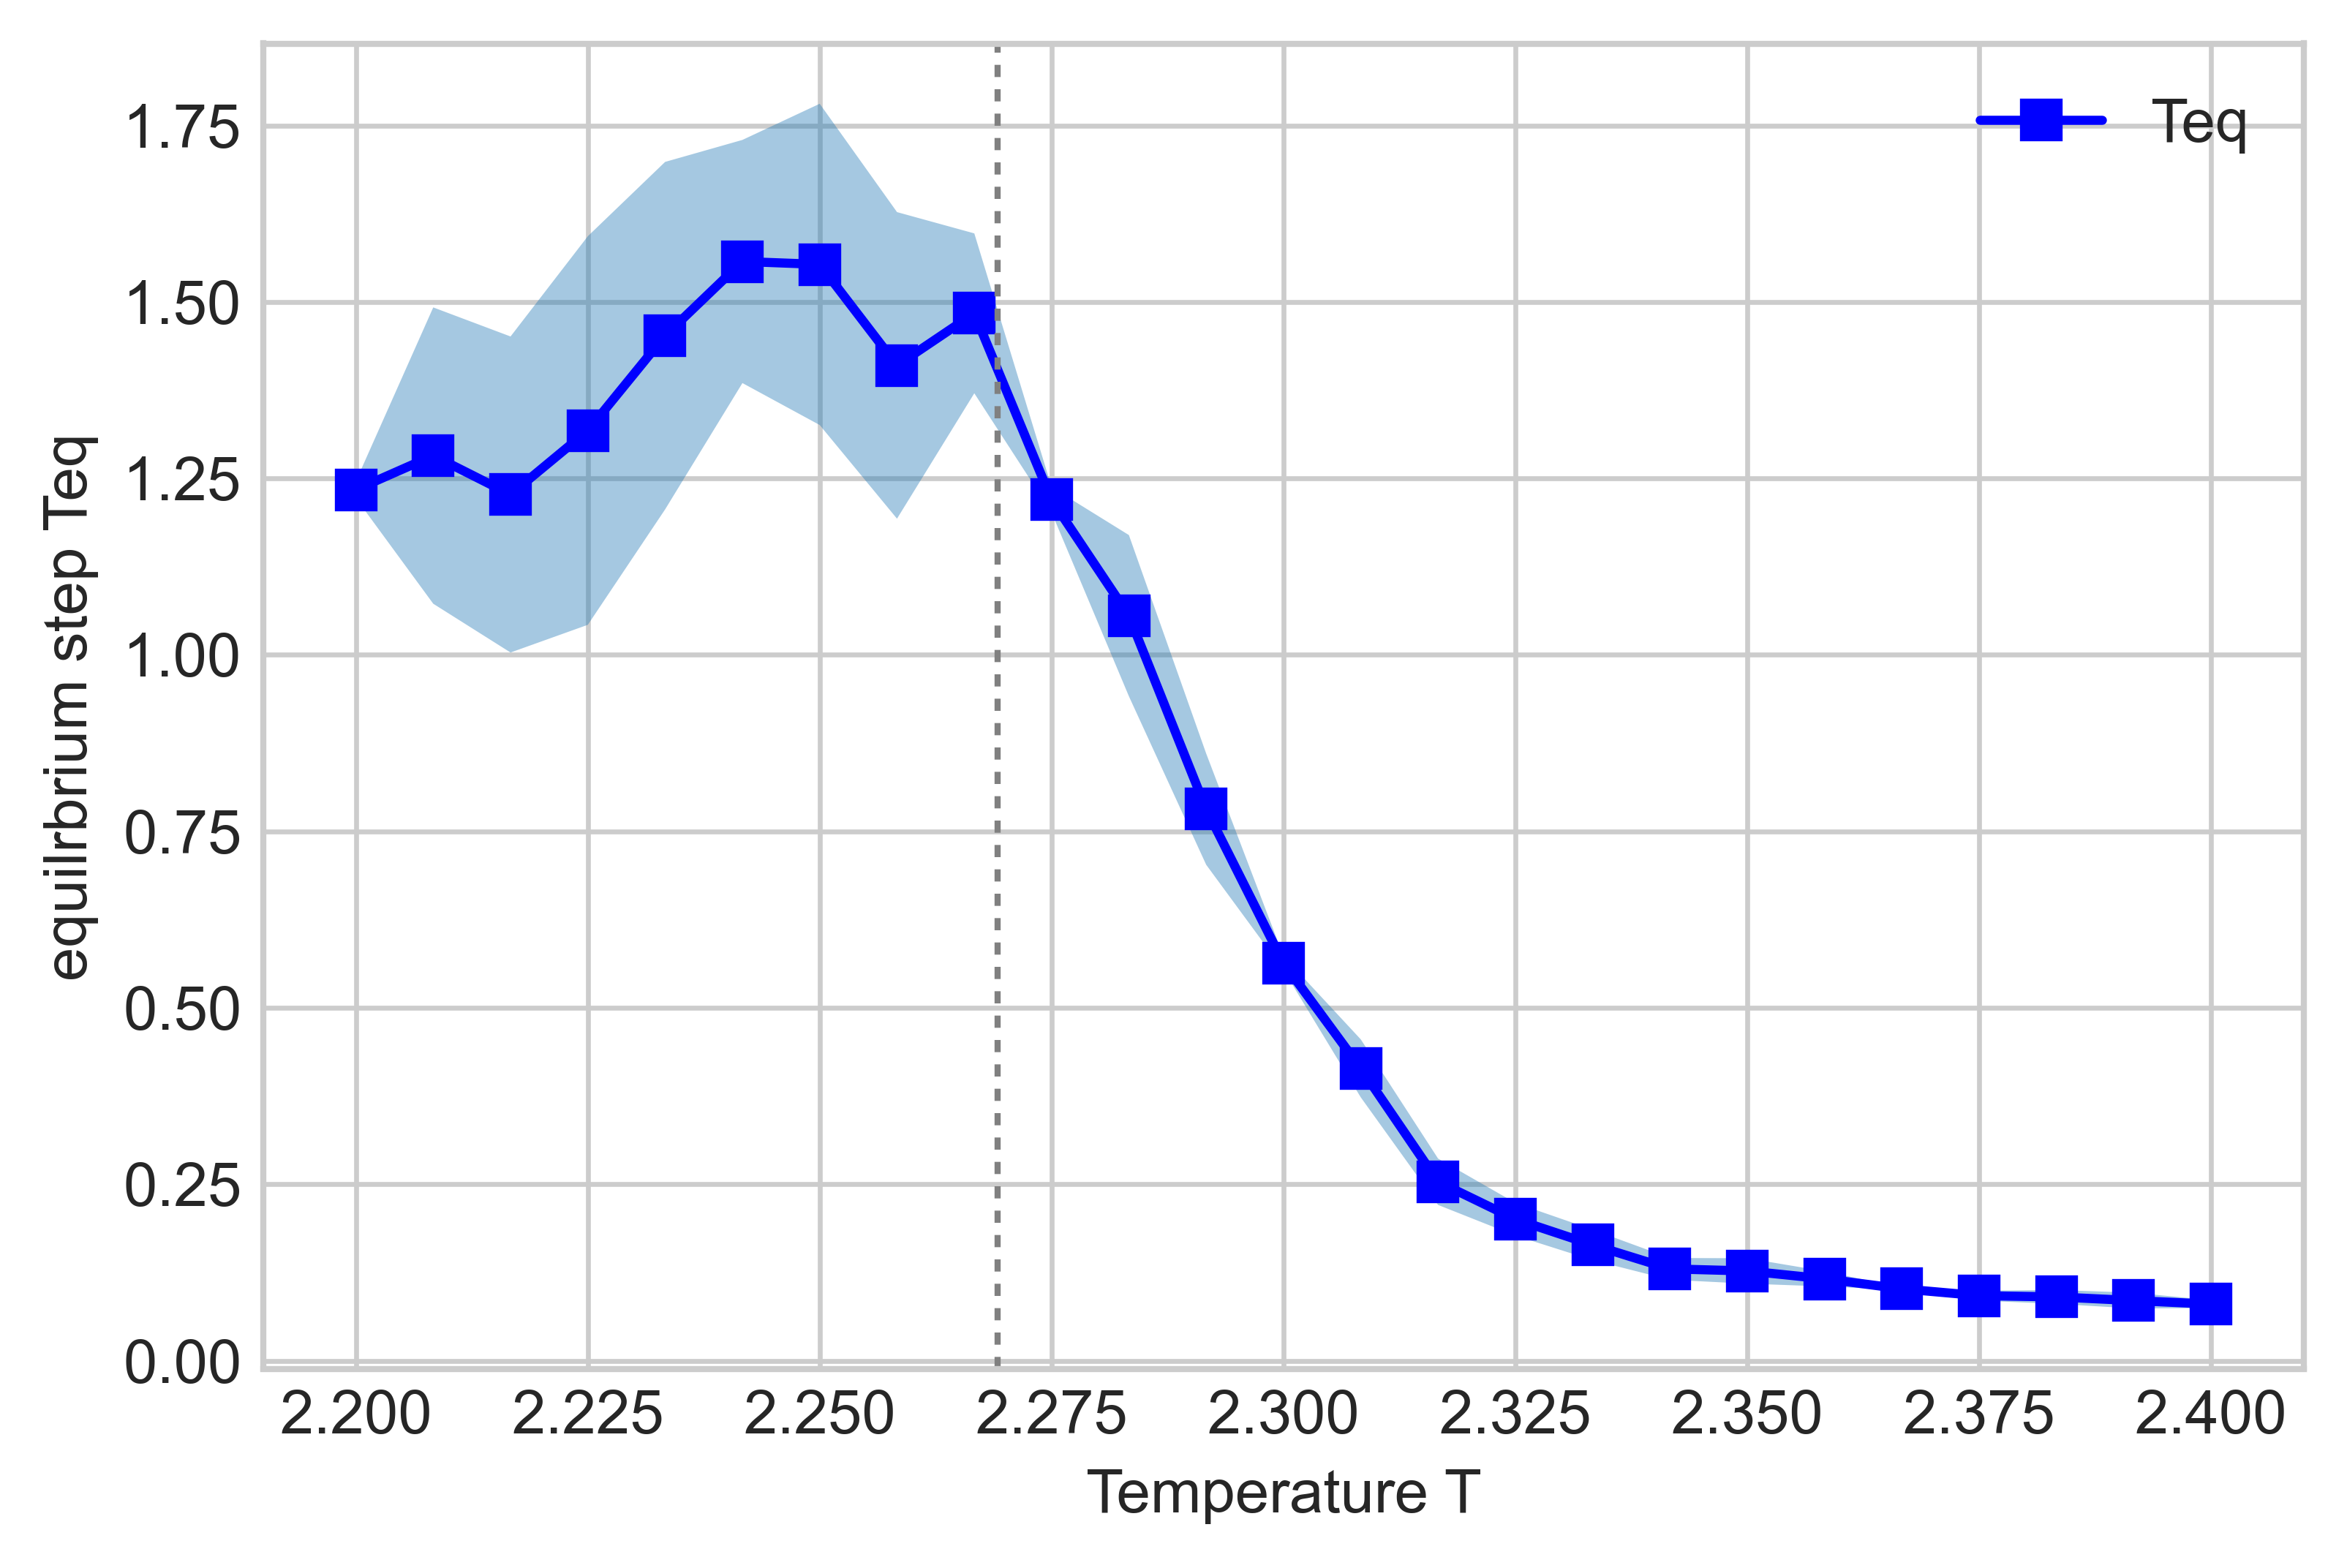

[array([ 2.2     , -0.902   , -0.9008  , ...,  0.8274  , -0.768   ,
         0.613818])
 array([ 2.20833 , -0.8928  ,  0.8508  , ..., -0.7706  ,  0.7822  ,
         0.601373])
 array([ 2.21667 , -0.8904  ,  0.8172  , ...,  0.7672  , -0.7486  ,
         0.583218])
 array([ 2.225   , -0.874   ,  0.8432  , ...,  0.7534  , -0.7622  ,
         0.557988])
 array([ 2.23333 , -0.9044  , -0.9028  , ...,  0.7934  , -0.7874  ,
         0.525814])
 array([ 2.24167 , -0.8756  ,  0.8278  , ..., -0.7082  ,  0.666   ,
         0.495461])
 array([ 2.25    , -0.8826  ,  0.8424  , ...,  0.591   , -0.6412  ,
         0.464255])
 array([ 2.25833 , -0.894   ,  0.7932  , ...,  0.622   , -0.669   ,
         0.419752])
 array([ 2.26667 , -0.84    ,  0.8114  , ...,  0.3968  , -0.631   ,
         0.368911])
 array([ 2.275  , -0.8758 ,  0.7824 , ...,  0.5782 , -0.569  ,  0.30257])
 array([ 2.28333 , -0.8614  , -0.8612  , ..., -0.6468  ,  0.6214  ,
         0.244946])
 array([ 2.29167 , -0.863   ,  0.7892  , ..., 

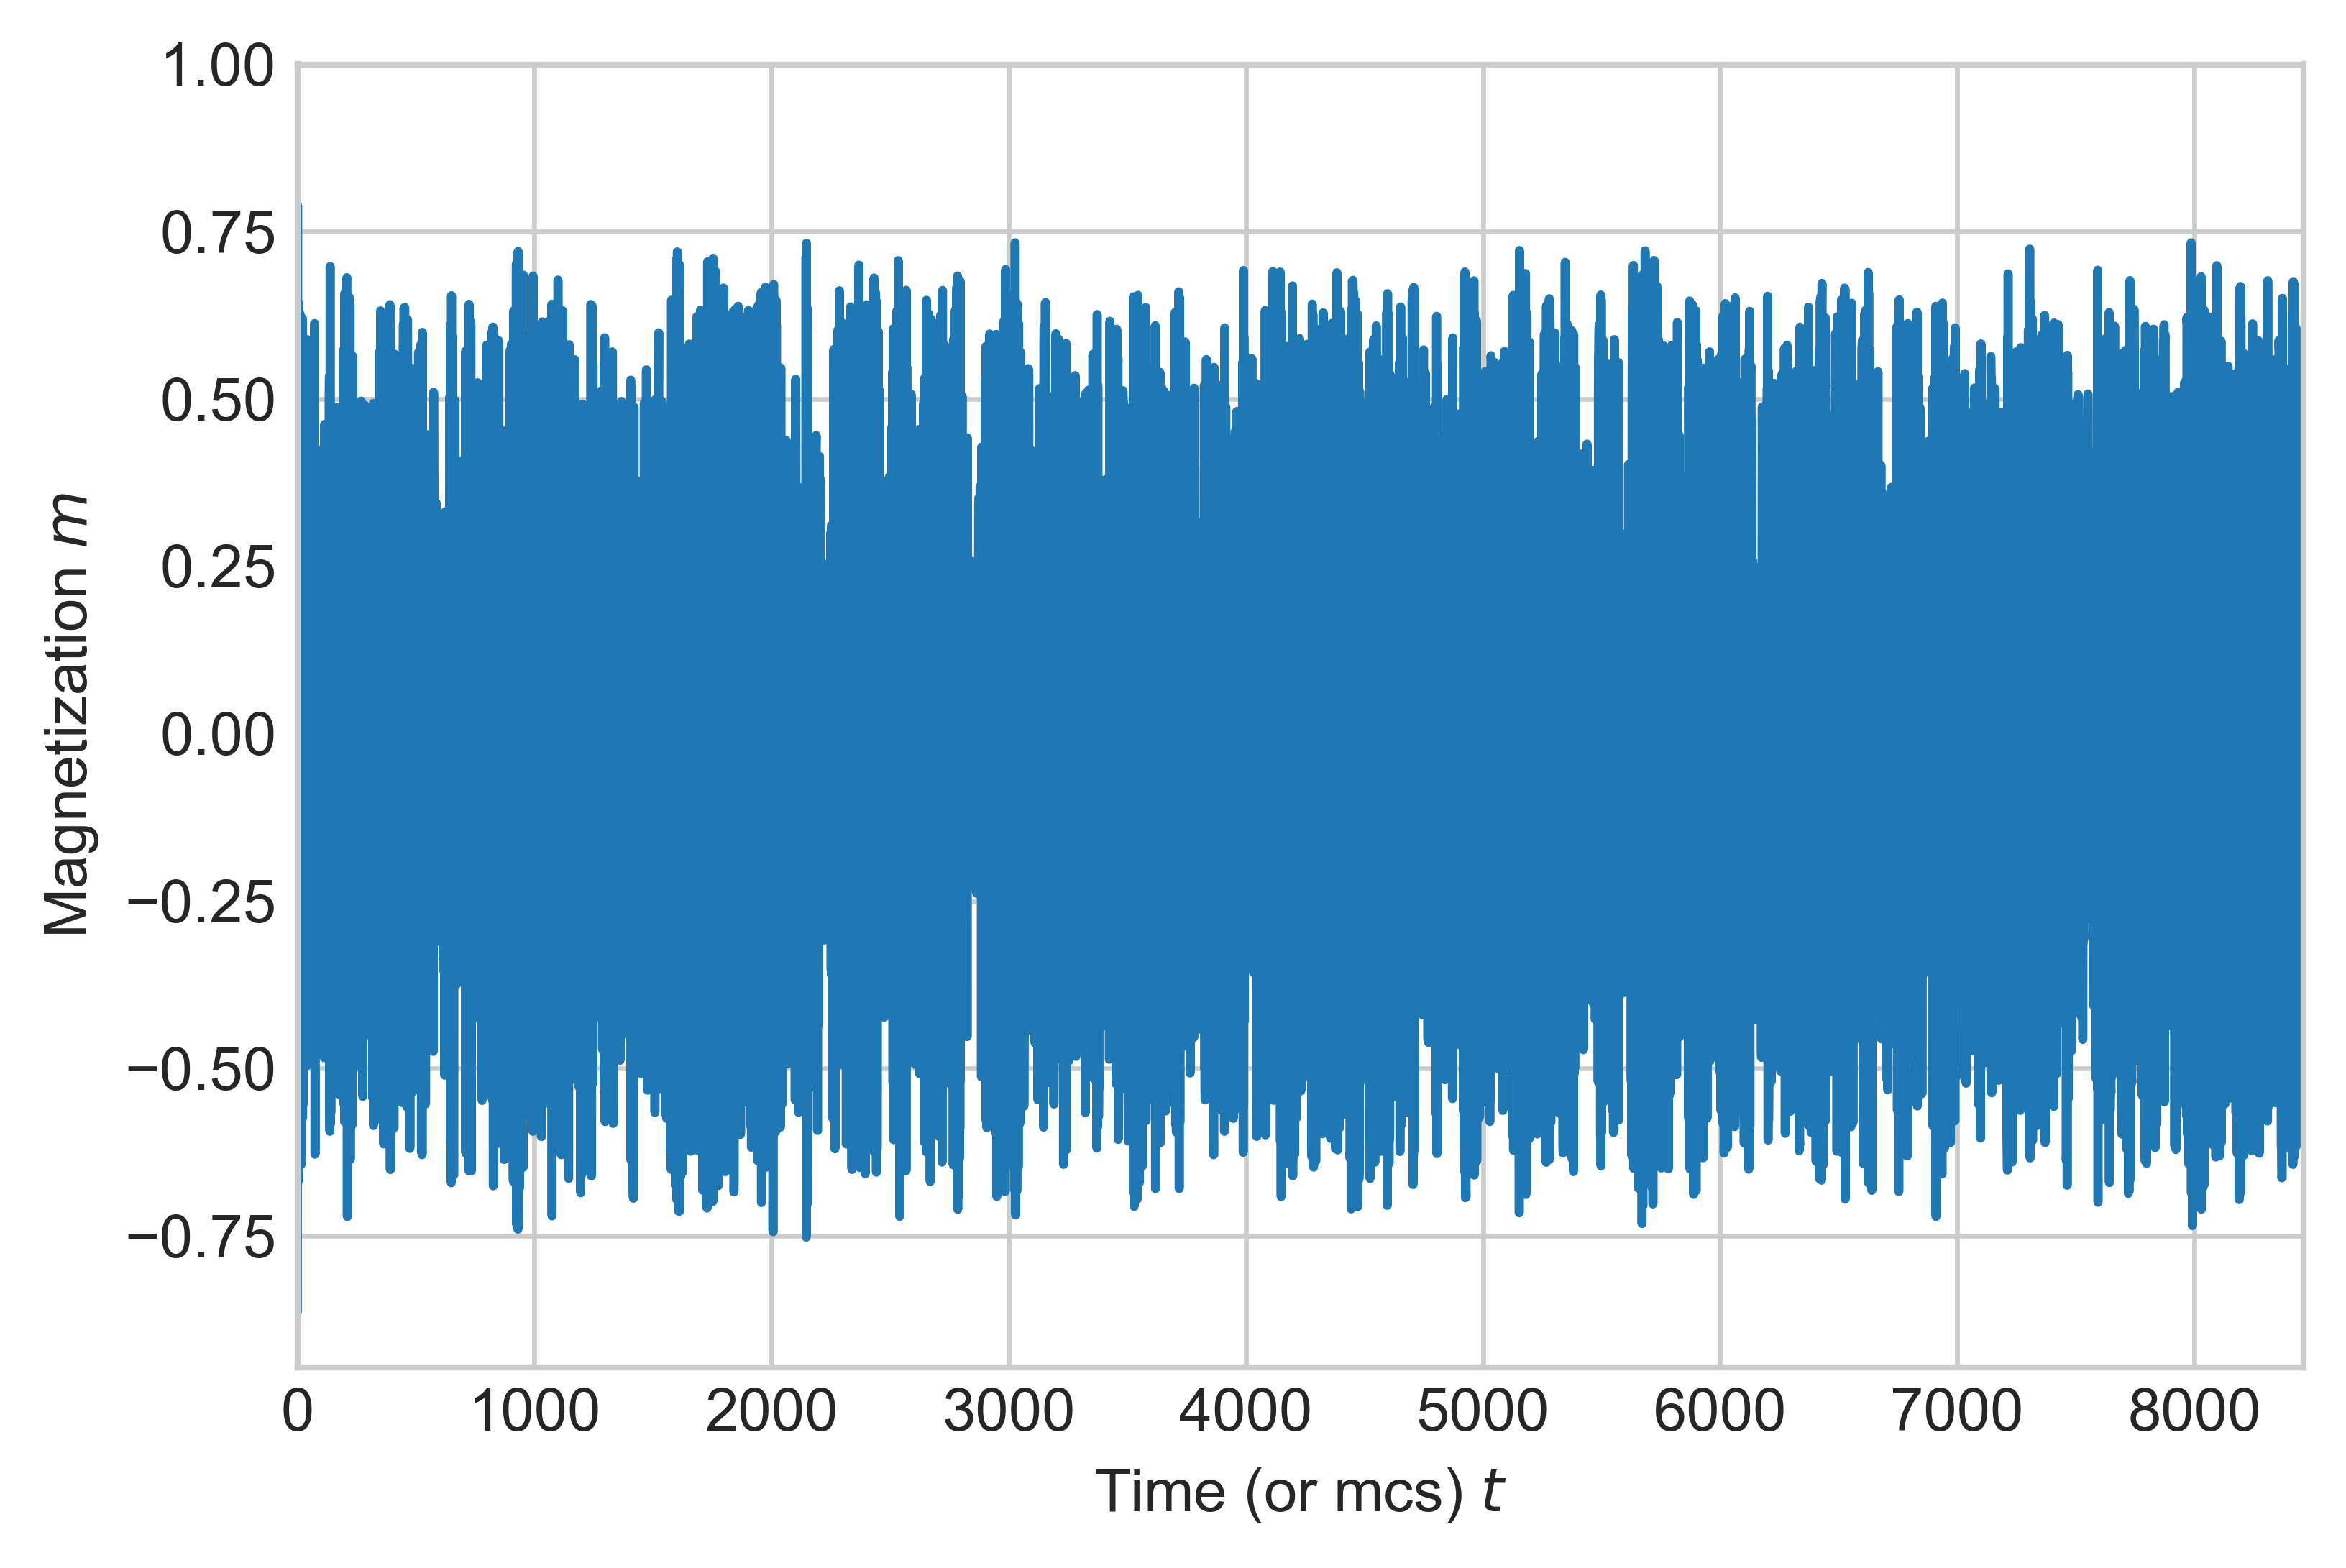

<m> is  -0.0026673373522458623


<Figure size 3600x2400 with 0 Axes>

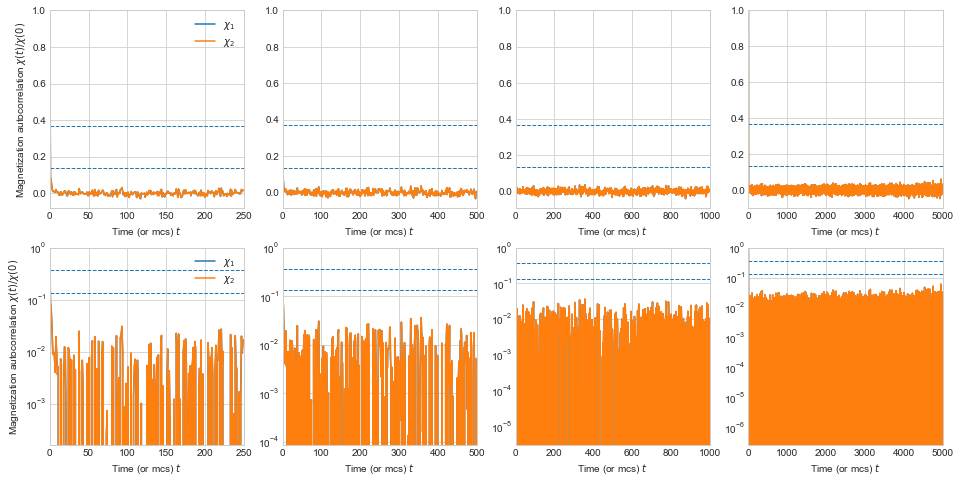

In [181]:
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Wolff\Wolff_c_100_int25_auto2_",8,isWolff=True,abs=False,useStepSize=True)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt,2.2,2.4,25)
tau_data_avg, tau_data_dev_sqrt = tau_data_process("..\C++\Result\Wolff\Wolff_c_100_int25_auto2_",8,isWolff=True,abs=True,useStepSize=True)
plot_chi_time(tau_data_avg, tau_data_dev_sqrt,2.2,2.4,25)

tau_drawer_loading("..\C++\Result\Wolff\Wolff_c_100_int25_auto2_"+str(1)+".csv",abs=False,draw_fitting=[None],slice = [250,500,1000,5000])

In [ ]:
# plt.plot(np.arange(0,epoch),mlist)
# plt.axhline(m_expec)
# plt.show()

# _bin2 = 200
# x = np.arange(0,_bin2)
# y = auto_chi[0:_bin2]
# tt, C_p = np.polyfit(x,np.log(y),1,w=np.sqrt(y),cov= True)

# TT = np.vstack([x**(1-i) for i in range(2)]).T
# yi = np.dot(TT,tt)
# C_yi = np.dot(TT,np.dot(C_p,TT.T))
# sig_yi = np.sqrt(np.diag(C_yi))

# slice = [600,1000,5000,10000]
# _bin = slice[0]
# # plt.subplot(2,1,1)
# fig, ax = plt.subplots(1,1)
# # plt.plot(np.arange(0,_bin),auto_chi[0:_bin]/auto_chi[0])
# # plt.plot(np.arange(0,_bin),auto_chi2[0:_bin]/auto_chi2[0])
# ax.fill_between(x, np.exp(yi+sig_yi)/max(np.exp(yi)), np.exp(yi-sig_yi)/max(np.exp(yi)), alpha=.25)
# plt.axhline(1/np.e,linestyle='--',lw=1)
# plt.axhline(1/np.e**2,linestyle='--',lw=1)
# plt.plot(x,np.exp(yi)/max(np.exp(yi)))